# <h1><center>PUC Minas - PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS</center></h1>

<h2><center>Pós-Graduação em Ciência de Dados e Big Data</center></h2>

<h3><center>TRABALHO DE CONCLUSÃO DE CURSO</center><br>
TÍTULO:<br>
<br>
ALUNO: Wender Pereira Corrêa</h3>
Matrícula:
<p>Este notebook é referente ao Trabalho de Conclusão de Curso em Ciência de Dados e Big Data.</p>

#Leitura dos dados e importação das bibliotecas utilizadas

In [1]:
#IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import numpy as np
import zipfile
import requests
from io import BytesIO
import os
import glob
import seaborn as sns
sns.set_style('whitegrid')
import time

In [2]:
#Importação da função Counter e da biblioteca matplotlib.pyplot
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
#definição de configuração de dataframes
#pd.set_option('display.max_rows',1000)
#pd.set_option('display.max_columns',500)
#pd.set_option('display.width',1200)
#pd.set_option('display.precision',4)
#pd.set_option('display.expand_frame_repr',False)


In [4]:
# Plotação de um gráfico para mostrar a dispersão dos dados. 
#O % e inline significa que o gráfico será mostrado aqui no notebook, e não em um arquivo
%matplotlib inline

In [5]:
# Definindo a pasta de trabalho
dirCandidatoAnalise = "./candidatoAnalise"
dirCandidatoCassacaoAnalise = "./candidatoCassacaoAnalise" 
dirBemCandidato = "./bemCandidatoAnalise" 
 
os.makedirs(dirCandidatoAnalise, exist_ok=True)
os.makedirs(dirCandidatoCassacaoAnalise, exist_ok=True)
os.makedirs(dirBemCandidato, exist_ok=True)


In [6]:
def descompactar(nome_arquivo_compactado, diretorio):
    #Lê o arquivo compactado e extrai o conteúdo
    #print(nome_arquivo_compactado)
    filebytes = BytesIO(
        requests.get(nome_arquivo_compactado).content
    )
    myzip = zipfile.ZipFile(filebytes)
    myzip.extractall(diretorio)
    return "Concluído"

<b>1) Dados Politicos</b>

In [7]:
ca = 2014
while ca < 2022:
    urlCandidatoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_" + str(ca)+ ".zip"
    #descompactar(urlCandidatoAnalise,dirCandidatoAnalise)
    urlCandidatoCassacaoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/motivo_cassacao/motivo_cassacao_" + str(ca)+ ".zip"
    #descompactar(urlCandidatoCassacaoAnalise,dirCandidatoCassacaoAnalise)
    urlBemCandidatoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/bem_candidato/bem_candidato_" + str(ca)+ ".zip"
    #descompactar(urlBemCandidatoAnalise,dirBemCandidato)    
    ca+=2


<b>1) Dados Candidato</b>

In [8]:
print('Arquivos com extensão csv Candidato:')
concatenar = []
with os.scandir(dirCandidatoAnalise) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)
    path = dirCandidatoAnalise
    # csv files in the path
    files = glob.glob(path + "/*.csv")
    # defining an empty list to store 
    # content
    data_frame = pd.DataFrame()
    content = []
    # checking all the csv files in the 
    # specified path
    for filename in files:
        df = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', 
            error_bad_lines=False,dtype={"SQ_CANDIDATO": int, "ANO_ELEICAO": int,"SG_UF" : "string", "NR_TURNO": int,"HH_GERACAO" : object ,"CD_TIPO_ELEICAO" : int,"NM_TIPO_ELEICAO" : "string","CD_ELEICAO" : "string","DS_ELEICAO" : "string","DT_ELEICAO" : "string","TP_ABRANGENCIA" : "string","SG_UE" : "string","NM_UE" : "string","CD_CARGO" : int,"DS_CARGO" : "string","NR_CANDIDATO" : int,"NM_CANDIDATO" : "string","NM_URNA_CANDIDATO" : "string","NM_SOCIAL_CANDIDATO" : "string","NR_CPF_CANDIDATO" : "string","NM_EMAIL" : "string","CD_SITUACAO_CANDIDATURA" : "string","DS_SITUACAO_CANDIDATURA" : "string","CD_DETALHE_SITUACAO_CAND" : "string","DS_DETALHE_SITUACAO_CAND" : "string","TP_AGREMIACAO" : "string","NR_PARTIDO" : int,"SG_PARTIDO" : "string","NM_PARTIDO" : "string","SQ_COLIGACAO" : "string","NM_COLIGACAO" : "string","DS_COMPOSICAO_COLIGACAO" : "string","CD_NACIONALIDADE" : int,"DS_NACIONALIDADE" : "string","SG_UF_NASCIMENTO" : "string","CD_MUNICIPIO_NASCIMENTO" : "string","NM_MUNICIPIO_NASCIMENTO" : "string","DT_NASCIMENTO" : "string","NR_IDADE_DATA_POSSE" : float ,"NR_TITULO_ELEITORAL_CANDIDATO" : "string","CD_GENERO" : int,"DS_GENERO" : "string","CD_GRAU_INSTRUCAO" : int,"DS_GRAU_INSTRUCAO" : "string","CD_ESTADO_CIVIL" : int,"DS_ESTADO_CIVIL" : "string","CD_OCUPACAO" : "string", "DS_OCUPACAO" : "string","VR_DESPESA_MAX_CAMPANHA" : "string","CD_SIT_TOT_TURNO" : "string","DS_SIT_TOT_TURNO" : "string","ST_REELEICAO" : "string","ST_DECLARAR_BENS" : "string","NR_PROTOCOLO_CANDIDATURA" : "string","NR_PROCESSO" : "string" ,"CD_SITUACAO_CANDIDATO_PLEITO" : "string","DS_SITUACAO_CANDIDATO_PLEITO" : "string","CD_SITUACAO_CANDIDATO_URNA" : "string", "DS_SITUACAO_CANDIDATO_URNA" : "string","ST_CANDIDATO_INSERIDO_URNA" : "string"})
        df.drop_duplicates()
        content.append(df)
    # converting content to data frame
    data_frame = pd.concat(content).drop_duplicates()

Arquivos com extensão csv Candidato:
consulta_cand_2014_AC.csv
consulta_cand_2014_AL.csv
consulta_cand_2014_AM.csv
consulta_cand_2014_AP.csv
consulta_cand_2014_BA.csv
consulta_cand_2014_BR.csv
consulta_cand_2014_BRASIL.csv
consulta_cand_2014_CE.csv
consulta_cand_2014_DF.csv
consulta_cand_2014_ES.csv
consulta_cand_2014_GO.csv
consulta_cand_2014_MA.csv
consulta_cand_2014_MG.csv
consulta_cand_2014_MS.csv
consulta_cand_2014_MT.csv
consulta_cand_2014_PA.csv
consulta_cand_2014_PB.csv
consulta_cand_2014_PE.csv
consulta_cand_2014_PI.csv
consulta_cand_2014_PR.csv
consulta_cand_2014_RJ.csv
consulta_cand_2014_RN.csv
consulta_cand_2014_RO.csv
consulta_cand_2014_RR.csv
consulta_cand_2014_RS.csv
consulta_cand_2014_SC.csv
consulta_cand_2014_SE.csv
consulta_cand_2014_SP.csv
consulta_cand_2014_TO.csv
consulta_cand_2016_AC.csv
consulta_cand_2016_AL.csv
consulta_cand_2016_AM.csv
consulta_cand_2016_AP.csv
consulta_cand_2016_BA.csv
consulta_cand_2016_BRASIL.csv
consulta_cand_2016_CE.csv
consulta_cand_2016_

In [9]:
data_frame.dtypes

DT_GERACAO                      object
HH_GERACAO                      object
ANO_ELEICAO                      int32
CD_TIPO_ELEICAO                  int32
NM_TIPO_ELEICAO                 string
                                 ...  
CD_SITUACAO_CANDIDATO_PLEITO    string
DS_SITUACAO_CANDIDATO_PLEITO    string
CD_SITUACAO_CANDIDATO_URNA      string
DS_SITUACAO_CANDIDATO_URNA      string
ST_CANDIDATO_INSERIDO_URNA      string
Length: 63, dtype: object

In [10]:
#Calcula o total e a % de valores ausentes
num_ausentes = data_frame.isna().sum()
porc_ausentes = data_frame.isna().sum() * 100 / len(data_frame)
df_ausentes = pd.DataFrame({
    'Coluna': data_frame.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
DT_GERACAO,DT_GERACAO,0,0.0
HH_GERACAO,HH_GERACAO,0,0.0
ANO_ELEICAO,ANO_ELEICAO,0,0.0
CD_TIPO_ELEICAO,CD_TIPO_ELEICAO,0,0.0
NM_TIPO_ELEICAO,NM_TIPO_ELEICAO,0,0.0
...,...,...,...
CD_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_PLEITO,0,0.0
DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,0,0.0
CD_SITUACAO_CANDIDATO_URNA,CD_SITUACAO_CANDIDATO_URNA,0,0.0
DS_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,0,0.0


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,54232014,3506420146010000,2,DEFERIDO,2,DEFERIDO,SIM
1,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,56222014,5212120146010000,2,DEFERIDO,2,DEFERIDO,SIM
2,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,54682014,3757720146010000,2,DEFERIDO,2,DEFERIDO,SIM
3,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,55432014,4501920146010000,2,DEFERIDO,2,DEFERIDO,SIM
4,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,N,55672014,4744720146010000,2,DEFERIDO,2,DEFERIDO,SIM


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
558003,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO POR QP,N,S,-1,06003782920206240033,2,DEFERIDO,2,DEFERIDO,SIM
558004,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,06001765820206260401,2,DEFERIDO,2,DEFERIDO,SIM
558005,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO POR MÉDIA,S,S,-1,06003452920206260083,2,DEFERIDO,2,DEFERIDO,SIM
558006,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO,N,S,-1,06001334120206240090,2,DEFERIDO,2,DEFERIDO,SIM
558007,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,06007268020206260295,2,DEFERIDO,2,DEFERIDO,SIM


(array([ 26271.,      0.,      0., 498340.,      0.,      0.,  29180.,
             0.,      0., 558010.]),
 array([2014. , 2014.6, 2015.2, 2015.8, 2016.4, 2017. , 2017.6, 2018.2,
        2018.8, 2019.4, 2020. ]),
 <BarContainer object of 10 artists>)

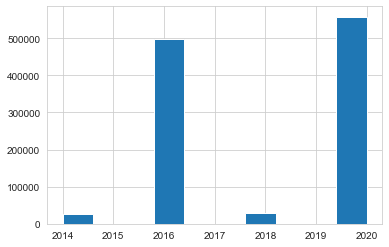

In [11]:
display(data_frame.head())
# Imprimindo as últimas linhas
display(data_frame.tail())
# Informações do nosso DataFrame
data_frame.describe()
# Dimensões do df_dados
data_frame.shape
plt.hist(x = data_frame['ANO_ELEICAO'] )


<b> Matriz de correlação de atributos </b>

Text(-20.000000000000007, 0.5, 'características do núcleo da célula')

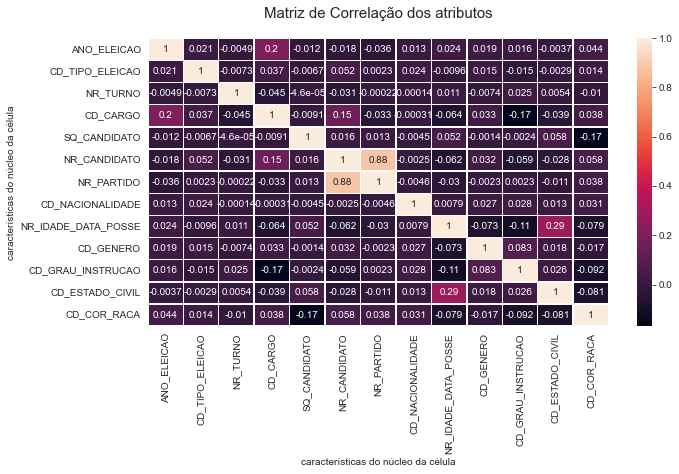

In [12]:
# O corr() método do Pandas DataFrame  é usado para calcular a matriz. 
# Por padrão, ele calcula o coeficiente de correlação de Pearson
correlation_mat = data_frame.corr(method='pearson')
# Definindo as configurações do Gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])
# Usando o método heatmap para traçar a Matriz
# O parâmetro ' annot=True' exibe os valores do coeficiente de correlação em cada célula.
sns.heatmap(correlation_mat, annot = True, linewidth=0.5)
# Definindo titulo e labels do gráfico
eixo.set_title('Matriz de Correlação dos atributos', fontsize=15, pad=20)
eixo.set_xlabel ("características do núcleo da célula")
eixo.set_ylabel ("características do núcleo da célula")

<b> 2 - Dados Cassação </b>

In [13]:
print('Arquivos com extensão csv Cassação:')
concatenar = []
with os.scandir(dirCandidatoCassacaoAnalise) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)
    path = dirCandidatoCassacaoAnalise
    # csv files in the path
    files = glob.glob(path + "/*.csv")
    # defining an empty list to store 
    # content
    data_frame_cassacao = pd.DataFrame()
    content_situacao = []
    # checking all the csv files in the 
    # specified path
    for filename in files:
        dfs = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', error_bad_lines=False, dtype={"SQ_CANDIDATO": int, "ANO_ELEICAO": int})
        content_situacao.append(dfs)
    # converting content to data frame
    data_frame_cassacao = pd.concat(content_situacao).drop_duplicates()

Arquivos com extensão csv Cassação:
motivo_cassacao_2014_AC.csv
motivo_cassacao_2014_AL.csv
motivo_cassacao_2014_AM.csv
motivo_cassacao_2014_AP.csv
motivo_cassacao_2014_BA.csv
motivo_cassacao_2014_BR.csv
motivo_cassacao_2014_BRASIL.csv
motivo_cassacao_2014_CE.csv
motivo_cassacao_2014_DF.csv
motivo_cassacao_2014_ES.csv
motivo_cassacao_2014_GO.csv
motivo_cassacao_2014_MA.csv
motivo_cassacao_2014_MG.csv
motivo_cassacao_2014_MS.csv
motivo_cassacao_2014_MT.csv
motivo_cassacao_2014_PA.csv
motivo_cassacao_2014_PB.csv
motivo_cassacao_2014_PE.csv
motivo_cassacao_2014_PI.csv
motivo_cassacao_2014_PR.csv
motivo_cassacao_2014_RJ.csv
motivo_cassacao_2014_RN.csv
motivo_cassacao_2014_RO.csv
motivo_cassacao_2014_RR.csv
motivo_cassacao_2014_RS.csv
motivo_cassacao_2014_SC.csv
motivo_cassacao_2014_SE.csv
motivo_cassacao_2014_SP.csv
motivo_cassacao_2014_TO.csv
motivo_cassacao_2016_AC.csv
motivo_cassacao_2016_AL.csv
motivo_cassacao_2016_AM.csv
motivo_cassacao_2016_AP.csv
motivo_cassacao_2016_BA.csv
motivo_c

In [14]:
#Calcula o total e a % de valores ausentes
num_ausentes = data_frame_cassacao.isna().sum()
porc_ausentes = data_frame_cassacao.isna().sum() * 100 / len(data_frame_cassacao)
df_ausentes = pd.DataFrame({
    'Coluna': data_frame_cassacao.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
DT_GERACAO,DT_GERACAO,0,0.0
HH_GERACAO,HH_GERACAO,0,0.0
ANO_ELEICAO,ANO_ELEICAO,0,0.0
CD_TIPO_ELEICAO,CD_TIPO_ELEICAO,0,0.0
NM_TIPO_ELEICAO,NM_TIPO_ELEICAO,0,0.0
CD_ELEICAO,CD_ELEICAO,0,0.0
DS_ELEICAO,DS_ELEICAO,0,0.0
SG_UF,SG_UF,0,0.0
SG_UE,SG_UE,0,0.0
NM_UE,NM_UE,0,0.0


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_MOTIVO_CASSACAO
0,05/04/2021,18:39:43,2014,1,Eleição Suplementar,268,Eleição Suplementar Governador AM,AM,AM,AMAZONAS,1345306401,Ausência de requisito de registro
1,05/04/2021,18:39:43,2014,1,Eleição Suplementar,268,Eleição Suplementar Governador AM,AM,AM,AMAZONAS,1345306408,Ficha limpa (LC 64/90)
1,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929209,Ausência de requisito de registro
2,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929208,Ausência de requisito de registro
3,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929203,Ausência de requisito de registro


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_MOTIVO_CASSACAO
18143,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,MG,46094,ILICÍNEA,1152245766,Ausência de requisito de registro
18145,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,62359,BOCAINA,892716418,Ausência de requisito de registro
18146,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,PA,4332,BRAGANÇA,-1732656223,Indeferimento de partido ou coligação.
18147,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,ES,56308,GOVERNADOR LINDENBERG,-1603432016,Ausência de requisito de registro
18148,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,68535,PERUÍBE,892821909,Ficha limpa (LC 64/90)


(array([5.0000e+00, 0.0000e+00, 0.0000e+00, 1.9170e+04, 0.0000e+00,
        0.0000e+00, 2.6010e+03, 0.0000e+00, 0.0000e+00, 1.8149e+04]),
 array([2014. , 2014.6, 2015.2, 2015.8, 2016.4, 2017. , 2017.6, 2018.2,
        2018.8, 2019.4, 2020. ]),
 <BarContainer object of 10 artists>)

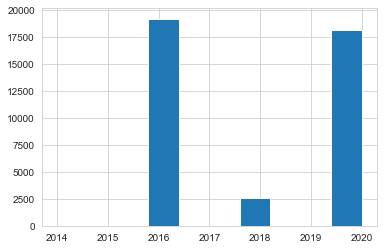

In [15]:
display(data_frame_cassacao.head())
# Imprimindo as últimas linhas
display(data_frame_cassacao.tail())
# Informações do nosso DataFrame
data_frame_cassacao.describe()
# Dimensões do df_dados
data_frame_cassacao.shape
plt.hist(x = data_frame_cassacao['ANO_ELEICAO'] )

<b> Dados dos Bens do Candidatos </b>

In [16]:
print('Arquivos com extensão csv Bens:')
concatenar = []
with os.scandir(dirBemCandidato) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)
    path = dirBemCandidato
    # csv files in the path
    files = glob.glob(path + "/*.csv")
    # defining an empty list to store 
    # content
    data_frame_Bem_candidato = pd.DataFrame()
    content_situacao_bem = []
    # checking all the csv files in the 
    # specified path
    for filename in files:
        dfsb = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', error_bad_lines=False, dtype={"SQ_CANDIDATO": int, "ANO_ELEICAO": int})
        content_situacao_bem.append(dfsb)
    # converting content to data frame
    data_frame_Bem_candidato = pd.concat(content_situacao_bem).drop_duplicates()

Arquivos com extensão csv Bens:
bem_candidato_2014_AC.csv
bem_candidato_2014_AL.csv
bem_candidato_2014_AM.csv
bem_candidato_2014_AP.csv
bem_candidato_2014_BA.csv
bem_candidato_2014_BR.csv
bem_candidato_2014_BRASIL.csv
bem_candidato_2014_CE.csv
bem_candidato_2014_DF.csv
bem_candidato_2014_ES.csv
bem_candidato_2014_GO.csv
bem_candidato_2014_MA.csv
bem_candidato_2014_MG.csv
bem_candidato_2014_MS.csv
bem_candidato_2014_MT.csv
bem_candidato_2014_PA.csv
bem_candidato_2014_PB.csv
bem_candidato_2014_PE.csv
bem_candidato_2014_PI.csv
bem_candidato_2014_PR.csv
bem_candidato_2014_RJ.csv
bem_candidato_2014_RN.csv
bem_candidato_2014_RO.csv
bem_candidato_2014_RR.csv
bem_candidato_2014_RS.csv
bem_candidato_2014_SC.csv
bem_candidato_2014_SE.csv
bem_candidato_2014_SP.csv
bem_candidato_2014_TO.csv
bem_candidato_2016_AC.csv
bem_candidato_2016_AL.csv
bem_candidato_2016_AM.csv
bem_candidato_2016_AP.csv
bem_candidato_2016_BA.csv
bem_candidato_2016_BRASIL.csv
bem_candidato_2016_CE.csv
bem_candidato_2016_ES.cs

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065574,23,41,Caderneta de poupança,OUROCAP TORCIDA PU,2552.25,12/07/2018,16:36:00
1,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065722,1,32,Quotas ou quinhões de capital,PARTICIPAÇÃO DE 20% NA FIRMA AS U DE CASTRO LI...,8000.00,12/07/2018,16:36:00
2,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065869,1,19,Outros bens imóveis,PROPRIETÁRIO DA EMPRESA E S DE MELO - CNPJ 04....,100000.00,12/07/2018,16:36:00
3,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065409,4,61,Depósito bancário em conta corrente no País,SALDO EM CONTA BANCÁRIA (BANCO DO BRASIL),937.91,12/07/2018,16:36:00
4,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065627,3,32,Quotas ou quinhões de capital,CLINICA MÉDICA,600000.00,12/07/2018,16:36:00


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
1013913,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,CE,14176,IPU,-128342282,1,13,Terreno,"UM TERRENO LOCALZIADO NA TRAVESSA IBIAPABA, CA...",200000.0,15/11/2020,22:52:18
1013914,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MT,89931,SÃO JOSÉ DOS QUATRO MARCOS,-1667922591,3,29,Outros bens móveis,Bovino 13 a 24 meses Femea 4,7200.0,15/11/2020,22:37:08
1013915,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MG,45950,IBIRITÉ,1152227231,1,12,Casa,Casa,150000.0,30/10/2020,15:48:13
1013917,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MG,52558,SÃO JOÃO EVANGELISTA,1152242648,3,21,"Veículo automotor terrestre: caminhão, automóv...",I 30 2010,30000.0,17/11/2020,15:52:44
1013918,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,PA,4537,CONCEIÇÃO DO ARAGUAIA,-1732827553,1,32,Quotas ou quinhões de capital,70% DO CAPITAL SOCIAL DA EMPRESA TRANSAQUINO T...,350000.0,06/08/2021,11:30:41


(array([  83053.,       0.,       0.,  977510.,       0.,       0.,
          93546.,       0.,       0., 1013919.]),
 array([2014. , 2014.6, 2015.2, 2015.8, 2016.4, 2017. , 2017.6, 2018.2,
        2018.8, 2019.4, 2020. ]),
 <BarContainer object of 10 artists>)

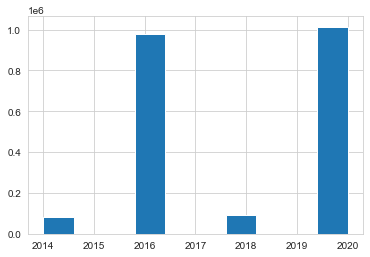

In [17]:
display(data_frame_Bem_candidato.head())
# Imprimindo as últimas linhas
display(data_frame_Bem_candidato.tail())
# Informações do nosso DataFrame
data_frame_Bem_candidato.describe()
# Dimensões do df_dados
data_frame_Bem_candidato.shape
#CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
plt.hist(x = data_frame_Bem_candidato['ANO_ELEICAO'] )

In [18]:
data_frame_bem_maior_10_mil = data_frame_Bem_candidato.loc[(data_frame_Bem_candidato['VR_BEM_CANDIDATO'] > 10000000)]


In [19]:
data_frame_bem_maior_10_mil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 345 to 1008440
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DT_GERACAO             755 non-null    object 
 1   HH_GERACAO             755 non-null    object 
 2   ANO_ELEICAO            755 non-null    int32  
 3   CD_TIPO_ELEICAO        755 non-null    int64  
 4   NM_TIPO_ELEICAO        755 non-null    object 
 5   CD_ELEICAO             755 non-null    int64  
 6   DS_ELEICAO             755 non-null    object 
 7   DT_ELEICAO             755 non-null    object 
 8   SG_UF                  755 non-null    object 
 9   SG_UE                  755 non-null    object 
 10  NM_UE                  755 non-null    object 
 11  SQ_CANDIDATO           755 non-null    int32  
 12  NR_ORDEM_CANDIDATO     755 non-null    int64  
 13  CD_TIPO_BEM_CANDIDATO  755 non-null    int64  
 14  DS_TIPO_BEM_CANDIDATO  755 non-null    object 
 15  

In [20]:
data_frame_Bem_candidato['VR_BEM_CANDIDATO'].min()


-113.14

In [21]:
data_frame_Bem_candidato['VR_BEM_CANDIDATO'].max()

5668873558.0

In [22]:
data_frame_Bem_candidato.sort_values(by='VR_BEM_CANDIDATO', ascending=False, inplace = True)


In [23]:
for index, row in data_frame_bem_maior_10_mil.iterrows():
    print(index)
    print('Candidato: ' + str(row['SQ_CANDIDATO']))
    print('Ano: ' + str(row['ANO_ELEICAO']))
    print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))
    print('Valor ' + str(row['VR_BEM_CANDIDATO']) + '\n')
    

345
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: LAGINHA AGRO INDUSTRIAL S/A
Valor 196031864.0

368
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: LUG TAXI AEREO LTDA
Valor 14987952.0

755
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: INCORPORAÇÃO AO CAPITAL DE LAGINHA AGRO INDUSTRIAL S/A DE 6.999.888 AÇÕES ON
Valor 16299739.0

1163
Candidato: -1539606910
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DA EMPRESA TOTAL PARTICIPAÇÕES LTDA
Valor 39375000.0

56
Candidato: -194312208
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE 74,872% DO VALOR TOTAL DA EMPRESA PRIORE EMPREENDIMENTOS E PARTICIPAÇOES
Valor 17434902.0

880
Candidato: 956668094
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE CAPITALNA FIRMA EUCATUR-EMP. UNIÃO CASCAVEL T.T LTDA. CGC

Candidato: -1733906620
Ano: 2016
Tipo de Bem: Terra nua
Descrição: TERRA NOVA II  SAO FELIX DO XINGU COM AREA DE 1.452,0 HA
Valor 10500000.0

609007
Candidato: 891913647
Ano: 2016
Tipo de Bem: Outros bens imóveis
Descrição: IMÓVEL NA AV. BRASIL, 341 - ITAPEVI
Valor 60000000.0

610207
Candidato: -1669141484
Ano: 2016
Tipo de Bem: Outros bens imóveis
Descrição: IMOVEL RURAL COM AREA 527 HA
Valor 15000000.0

622405
Candidato: -388620730
Ano: 2016
Tipo de Bem: Outros bens imóveis
Descrição: FAZENDA SITIO NOVO I LOCALIZADA NO MUNICIPIO DE BAIXA GRANDE DO RIBEIRO-PI (MAT. JUNTO AO LIBRO 06 FLS. 11/12 DE TRANCRIÇÃO LIVRO 03 SOB TRANSCRIÇÃO 959 CCIR N° 06976322098
Valor 21286251.5

635478
Candidato: -323847187
Ano: 2016
Tipo de Bem: Prédio residencial
Descrição: UMA CASA NO BAIRRO VISTA ALEGRE
Valor 15000000.0

638031
Candidato: -1863457710
Ano: 2016
Tipo de Bem: Outros bens móveis
Descrição: GRANJA
Valor 20000000.0

638555
Candidato: 1215773700
Ano: 2016
Tipo de Bem: Terreno
Descrição: TERREN

Valor 14000000.0

92249
Candidato: 892510545
Ano: 2018
Tipo de Bem: Quotas ou quinhões de capital
Descrição: #NULO#
Valor 42500000.0

92600
Candidato: 1281143562
Ano: 2018
Tipo de Bem: Quotas ou quinhões de capital
Descrição: REAL JG SERVICOS GERAIS EIRELI, CNPJ 08.247.960/0001-62
Valor 32000000.0

92737
Candidato: -517558780
Ano: 2018
Tipo de Bem: Outras participações societárias
Descrição: Aquisição de ações da empresa DB S/A
Valor 24424970.0

93141
Candidato: -258480518
Ano: 2018
Tipo de Bem: Outras participações societárias
Descrição: #NULO#
Valor 25900106.1

2717
Candidato: -1473995416
Ano: 2020
Tipo de Bem: Terreno
Descrição: UMA PROPRIEDADE DENOMINADA FAZENDA NOVA AMERICA NO MUNICIPIO DE GIRAU DO PONCIANO/AL
Valor 872000000.0

820
Candidato: 1346003279
Ano: 2020
Tipo de Bem: Apartamento
Descrição: aPARTAMENTO LOCALIZADO NA AVENIDA ALASCA, RESIDENCIAL VILA LOBOS
Valor 1400000000.0

1777
Candidato: 1346071742
Ano: 2020
Tipo de Bem: Outros bens imóveis
Descrição: chacara com 277 lo

Candidato: 1151673140
Ano: 2020
Tipo de Bem: Quotas ou quinhões de capital
Descrição: DUZENTAS E OITENTA E CINCO MILHOES NOVECENOS E VINTE E NOVE MIL  E DUZENTAS E TRINTA E TRES QUOTAS DE CAPITAL DA EMPRESA VIME PARTIPACOES LTDA 
Valor 285929233.0

815977
Candidato: 1151983400
Ano: 2020
Tipo de Bem: Casa
Descrição: uma casa residencial localizada na Rua dos Andradas, n. 336, centro São Lourenço 
Valor 28237000.0

816411
Candidato: 1216470426
Ano: 2020
Tipo de Bem: Terreno
Descrição: TERRENO NA PONTA DO FAROL - SÃO LU´ÍS
Valor 20000000.0

816792
Candidato: 1022384529
Ano: 2020
Tipo de Bem: Casa
Descrição: UMA CASA SITUADA NA RUA ELIS REGINA N°91, CASA 01, JARDIM CAMPOMAR, RIO DAS OSTRAS/RJ
Valor 54870000.0

825367
Candidato: 1087008510
Ano: 2020
Tipo de Bem: Quotas ou quinhões de capital
Descrição: FERTIMOURAO AGRICOLA LTDA
Valor 20000000.0

835528
Candidato: 892569091
Ano: 2020
Tipo de Bem: Apartamento
Descrição: apartamento
Valor 1100000000.0

842069
Candidato: -581892380
Ano: 2020
Ti

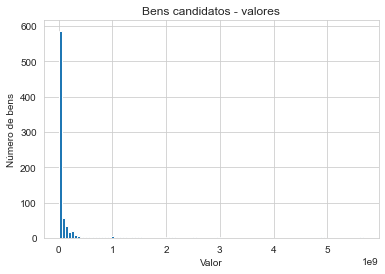

In [24]:
#Plotagem do histograma dos valores dos bens dos candidatos
data_frame_bem_maior_10_mil.VR_BEM_CANDIDATO.hist(bins=100) 
plt.style.use('seaborn-pastel')
plt.xlabel("Valor")
plt.ylabel("Número de bens")
plt.title("Bens candidatos - valores")
plt.show()

In [25]:
data_frame_Bem_candidato['VR_BEM_CANDIDATO'].describe().astype('int')

count       2168028
mean         116493
std         7044922
min            -113
25%            7000
50%           25000
75%           78211
max     -2147483648
Name: VR_BEM_CANDIDATO, dtype: int32

In [26]:
data_frame_Bem_candidato.loc[(data_frame_Bem_candidato['SQ_CANDIDATO'] == 957857202)]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
935608,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,4,99,OUTROS BENS E DIREITOS,Bens em comum do casal,5.668874e+09,10/12/2020,17:19:26
750577,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,1,49,Outras aplicações e Investimentos,COTAS DE CAPITAL - CREDISIS CREDIARI,8.621000e+03,10/12/2020,17:19:26
625914,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,3,45,"Aplicação de renda fixa (CDB, RDB e outros)",CREDISIS CREDIARE,7.934700e+02,10/12/2020,17:19:26
750576,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,2,63,Dinheiro em espécie - moeda nacional,SALDO CC 1359-5 AG: 005 - CREDISIS CREDIARE -,1.267400e+02,10/12/2020,17:19:26


In [27]:
data_frame_Bem_candidato.at[43715, 'VR_BEM_CANDIDATO' ] = 21000
data_frame_Bem_candidato.at[27403, 'VR_BEM_CANDIDATO' ] = 50000
data_frame_Bem_candidato.at[625914, 'VR_BEM_CANDIDATO' ] = 793
data_frame_Bem_candidato.at[750576, 'VR_BEM_CANDIDATO' ] = 127
data_frame_Bem_candidato.at[750577, 'VR_BEM_CANDIDATO' ] = 8621
data_frame_Bem_candidato.at[935608, 'VR_BEM_CANDIDATO' ] = 56688

In [28]:
data_frame_Bem_candidato.loc[(data_frame_Bem_candidato['SQ_CANDIDATO'] == 957857202)]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
935608,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,4,99,OUTROS BENS E DIREITOS,Bens em comum do casal,56688.0,10/12/2020,17:19:26
750577,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,1,49,Outras aplicações e Investimentos,COTAS DE CAPITAL - CREDISIS CREDIARI,8621.0,10/12/2020,17:19:26
625914,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,3,45,"Aplicação de renda fixa (CDB, RDB e outros)",CREDISIS CREDIARE,793.0,10/12/2020,17:19:26
750576,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,2,63,Dinheiro em espécie - moeda nacional,SALDO CC 1359-5 AG: 005 - CREDISIS CREDIARE -,127.0,10/12/2020,17:19:26


In [29]:
for index, row in data_frame_bem_maior_10_mil.iterrows():
    print(index)
    print('Candidato: ' + str(row['SQ_CANDIDATO']))
    print('Ano: ' + str(row['ANO_ELEICAO']))
    print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))
    print('Valor ' + str(row['VR_BEM_CANDIDATO']) + '\n')
    

345
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: LAGINHA AGRO INDUSTRIAL S/A
Valor 196031864.0

368
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: LUG TAXI AEREO LTDA
Valor 14987952.0

755
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: INCORPORAÇÃO AO CAPITAL DE LAGINHA AGRO INDUSTRIAL S/A DE 6.999.888 AÇÕES ON
Valor 16299739.0

1163
Candidato: -1539606910
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DA EMPRESA TOTAL PARTICIPAÇÕES LTDA
Valor 39375000.0

56
Candidato: -194312208
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE 74,872% DO VALOR TOTAL DA EMPRESA PRIORE EMPREENDIMENTOS E PARTICIPAÇOES
Valor 17434902.0

880
Candidato: 956668094
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE CAPITALNA FIRMA EUCATUR-EMP. UNIÃO CASCAVEL T.T LTDA. CGC

Ano: 2016
Tipo de Bem: Terra nua
Descrição: TERRA NOVA II  SAO FELIX DO XINGU COM AREA DE 1.452,0 HA
Valor 10500000.0

609007
Candidato: 891913647
Ano: 2016
Tipo de Bem: Outros bens imóveis
Descrição: IMÓVEL NA AV. BRASIL, 341 - ITAPEVI
Valor 60000000.0

610207
Candidato: -1669141484
Ano: 2016
Tipo de Bem: Outros bens imóveis
Descrição: IMOVEL RURAL COM AREA 527 HA
Valor 15000000.0

622405
Candidato: -388620730
Ano: 2016
Tipo de Bem: Outros bens imóveis
Descrição: FAZENDA SITIO NOVO I LOCALIZADA NO MUNICIPIO DE BAIXA GRANDE DO RIBEIRO-PI (MAT. JUNTO AO LIBRO 06 FLS. 11/12 DE TRANCRIÇÃO LIVRO 03 SOB TRANSCRIÇÃO 959 CCIR N° 06976322098
Valor 21286251.5

635478
Candidato: -323847187
Ano: 2016
Tipo de Bem: Prédio residencial
Descrição: UMA CASA NO BAIRRO VISTA ALEGRE
Valor 15000000.0

638031
Candidato: -1863457710
Ano: 2016
Tipo de Bem: Outros bens móveis
Descrição: GRANJA
Valor 20000000.0

638555
Candidato: 1215773700
Ano: 2016
Tipo de Bem: Terreno
Descrição: TERRENO DE 1.000 M² NA RUA SÃ

Candidato: 1086819275
Ano: 2018
Tipo de Bem: Outras aplicações e Investimentos
Descrição: DEBENTURES- OS SECURITIZADORA ¿ ADQUIRIDO EM 2011 R$ 9.600.000,00 AQUISIÇÃO EM 2012 APLICADO 1.700.000,00 E RESGATADO EM 2012 1.300.000,00 APLICAÇÃO EM 2013 R$ 1.600,000,00 EM 2014 AQUISIÇÃO DEBENTURE
Valor 20100000.0

79508
Candidato: -1668526331
Ano: 2018
Tipo de Bem: Terra nua
Descrição: UMA AREA DE TERRA DENOMINADA FAZENDA SAO MATEUS, C/ AREA DE MUN. DE GENERAL CARNEIRO/MT, ADQ. EM 06/04/2004 DE CLEITON EUSTAQUIO ROCHA - MATRICULA 34.724
Valor 11000000.0

80629
Candidato: 1022041227
Ano: 2018
Tipo de Bem: Casa
Descrição: Rio de Janeiro - RJ, Matrícula 024 do 2. Ofício do RGI (valor da última declaração de IR)
Valor 10500000.0

80761
Candidato: 1151593374
Ano: 2018
Tipo de Bem: Quotas ou quinhões de capital
Descrição: #NULO#
Valor 19197428.0

81457
Candidato: -128937028
Ano: 2018
Tipo de Bem: Quotas ou quinhões de capital
Descrição: APORTE PARA FUTURO AUMENTO DO CAPITAL SOCIAL NA SOC. STA MONIC

774166
Candidato: 1152021340
Ano: 2020
Tipo de Bem: Outras participações societárias
Descrição: Sócio Proprietário da Imex Empreendimentos Ltda - CNPJ 20615902/0001-40
Valor 15000000.0

782489
Candidato: 892998257
Ano: 2020
Tipo de Bem: VGBL - Vida Gerador de Benefício Livre
Descrição: Bradesco Vida e Previdência (prêmios acumulados)
Valor 16780453.36

785068
Candidato: -452670451
Ano: 2020
Tipo de Bem: Fundos: Ações, Mútuos de Privatização, Invest. Empresas Emergentes, Invest.Participação e Invest. Índice Mercado
Descrição: AÇÕES EMPRESA STARA FINANCEIRA 
Valor 14550000.0

788338
Candidato: -387869816
Ano: 2020
Tipo de Bem: Veículo automotor terrestre: caminhão, automóvel, moto, etc.
Descrição: Um veículo Ford, ano 1992/1993, cor Vinho, Placa: 8354
Valor 17000000.0

791414
Candidato: 893085102
Ano: 2020
Tipo de Bem: Outras participações societárias
Descrição: cotas
Valor 29700020.0

794267
Candidato: 1087210918
Ano: 2020
Tipo de Bem: Ações (inclusive as provenientes de linha telefônic

<b>ANALISE DADOS</b>

<b> Agrupamento de dados selecionando dados de interesse: </b> Dados do candidato 

In [30]:
#Seleção das colunas de interesse
df_consulta_candidato = data_frame[['SQ_CANDIDATO','ANO_ELEICAO','NR_CANDIDATO', 'NM_CANDIDATO', 'DS_CARGO','NR_PARTIDO','SG_PARTIDO','SG_UF','SG_UE','DS_SIT_TOT_TURNO','NR_IDADE_DATA_POSSE','DS_GENERO', 'DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL','DS_COR_RACA','DS_SIT_TOT_TURNO','ST_REELEICAO', 'TP_ABRANGENCIA','DS_SIT_TOT_TURNO','ST_REELEICAO','ST_DECLARAR_BENS','CD_GENERO','CD_GRAU_INSTRUCAO','DS_SITUACAO_CANDIDATURA', 'DT_NASCIMENTO']]

<b> Agrupamento de dados selecionando dados de interesse: </b>Dados do Cassação 

In [31]:
#Seleção das colunas de interesse
df_consulta_cassacao = data_frame_cassacao[['SQ_CANDIDATO','ANO_ELEICAO','DS_MOTIVO_CASSACAO']]
display(df_consulta_cassacao.head())
# Imprimindo as últimas linhas
display(df_consulta_cassacao.tail())
# Informações do nosso DataFrame
df_consulta_cassacao.describe()


,SQ_CANDIDATO,ANO_ELEICAO,DS_MOTIVO_CASSACAO
0,1345306401,2014,Ausência de requisito de registro
1,1345306408,2014,Ficha limpa (LC 64/90)
1,-582929209,2014,Ausência de requisito de registro
2,-582929208,2014,Ausência de requisito de registro
3,-582929203,2014,Ausência de requisito de registro


,SQ_CANDIDATO,ANO_ELEICAO,DS_MOTIVO_CASSACAO
18143,1152245766,2020,Ausência de requisito de registro
18145,892716418,2020,Ausência de requisito de registro
18146,-1732656223,2020,Indeferimento de partido ou coligação.
18147,-1603432016,2020,Ausência de requisito de registro
18148,892821909,2020,Ficha limpa (LC 64/90)


,SQ_CANDIDATO,ANO_ELEICAO
count,3.992500e+04,39925.000000
mean,2.045738e+07,2017.948353
std,1.180919e+09,1.933479
min,-1.993005e+09,2014.000000
25%,-1.538369e+09,2016.000000
50%,8.919356e+08,2018.000000
75%,1.022686e+09,2020.000000
max,1.411339e+09,2020.000000


<b> Left Join: Dados Candidato e Cassação </b>

In [32]:
m_df_candidato_cassacao = pd.merge(df_consulta_candidato, df_consulta_cassacao, on=['SQ_CANDIDATO','ANO_ELEICAO'], how="left")

In [33]:
display(m_df_candidato_cassacao.head())
# Imprimindo as últimas linhas
display(m_df_candidato_cassacao.tail())
# Informações do nosso DataFrame
m_df_candidato_cassacao.describe()


,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,ST_REELEICAO,TP_ABRANGENCIA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,DS_MOTIVO_CASSACAO
0,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,S,2,7,APTO,16/09/1972,NaN
1,1410065850,2014,40140,WILSON DE MELO LUNA,DEPUTADO ESTADUAL,40,PSB,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,S,2,4,APTO,06/04/1971,NaN
2,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,S,2,2,APTO,16/09/1968,NaN
3,1410065737,2014,43777,FRANCINEUDO SOUZA DA COSTA,DEPUTADO ESTADUAL,43,PV,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,S,2,8,APTO,01/10/1985,NaN
4,1410065799,2014,43250,MICHELE SARAIVA SAMPAIO,DEPUTADO ESTADUAL,43,PV,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,N,4,8,APTO,19/04/1977,NaN


,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,ST_REELEICAO,TP_ABRANGENCIA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,DS_MOTIVO_CASSACAO
1114719,-517292105,2020,11456,ALBERTINO VIEL,VEREADOR,11,PP,SC,83615,ELEITO POR QP,...,N,MUNICIPAL,ELEITO POR QP,N,S,2,3,APTO,20/05/1962,NaN
1114720,893008355,2020,51003,MARIA APARECIDA ALVES DOS SANTOS GARCIA,VEREADOR,51,PATRIOTA,SP,64157,NÃO ELEITO,...,N,MUNICIPAL,NÃO ELEITO,N,S,4,8,APTO,24/12/1987,NaN
1114721,892987285,2020,22333,CLENIL MENDES DOS SANTOS,VEREADOR,22,PL,SP,68950,ELEITO POR MÉDIA,...,S,MUNICIPAL,ELEITO POR MÉDIA,S,S,2,8,APTO,22/11/1961,NaN
1114722,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,N,MUNICIPAL,ELEITO,N,S,2,8,APTO,20/07/1949,NaN
1114723,893049816,2020,65171,ROMILDO SILVESTRE REZENDE DA SILVA,VEREADOR,65,PC do B,SP,68535,NÃO ELEITO,...,N,MUNICIPAL,NÃO ELEITO,N,S,2,4,APTO,03/08/1974,NaN


,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NR_PARTIDO,NR_IDADE_DATA_POSSE,CD_GENERO,CD_GRAU_INSTRUCAO
count,1.114724e+06,1.114724e+06,1.114724e+06,1.114724e+06,1.114651e+06,1.114724e+06,1.114724e+06
mean,3.638329e+07,2.018013e+03,2.886408e+04,3.108859e+01,4.531814e+01,2.652535e+00,5.703951e+00
std,1.143599e+09,2.043658e+00,2.132544e+04,2.033771e+01,1.198006e+01,9.393679e-01,1.778375e+00
min,-1.993005e+09,2.014000e+03,1.000000e+01,1.000000e+01,-9.510000e+02,-4.000000e+00,-4.000000e+00
25%,-5.829339e+08,2.016000e+03,1.322200e+04,1.400000e+01,3.700000e+01,2.000000e+00,4.000000e+00
50%,8.919058e+08,2.020000e+03,2.212500e+04,2.300000e+01,4.500000e+01,2.000000e+00,6.000000e+00
75%,1.086245e+09,2.020000e+03,4.400000e+04,4.500000e+01,5.300000e+01,4.000000e+00,7.000000e+00
max,1.411349e+09,2.020000e+03,9.099900e+04,9.000000e+01,9.990000e+02,4.000000e+00,8.000000e+00


<b> Tratamento dos dados da Idade </b>

In [34]:
#removendo dados com todas linhas faltando dados
m_df_candidato_cassacao.dropna(how='all', inplace=True)
#descobrindo a idade média
mediaIdade = round(m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'].mean(),0)
print(mediaIdade)
# Preenchendo a coluna com o valor da média:
m_df_candidato_cassacao.update(m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'].fillna(mediaIdade))
# Dimensões do df_dados
m_df_candidato_cassacao.shape




45.0


(1114724, 26)

In [35]:
m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'].describe().astype('int')


count    1114724
mean          45
std           11
min         -951
25%           37
50%           45
75%           53
max          999
Name: NR_IDADE_DATA_POSSE, dtype: int32

In [36]:
idade_max = m_df_candidato_cassacao[m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'] > 104]
idade_min = m_df_candidato_cassacao[m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'] < 18]


In [37]:
df_ida_max = idade_max[['ANO_ELEICAO','SG_UF','NR_CANDIDATO','NR_IDADE_DATA_POSSE','DT_NASCIMENTO','NM_CANDIDATO','DT_NASCIMENTO']]
df_ida_max

,ANO_ELEICAO,SG_UF,NR_CANDIDATO,NR_IDADE_DATA_POSSE,DT_NASCIMENTO,NM_CANDIDATO,DT_NASCIMENTO
40476,2016,AM,12345,944.0,09/04/1072,NAILSON ALVES DE CAMPOS,09/04/1072
41781,2016,AM,45888,999.0,31/01/0976,MARIA IZABEL PINTO BARBOSA,31/01/0976
42443,2016,AM,45000,999.0,27/09/0072,LUCAS DOS SANTOS CORREA,27/09/0072
43467,2016,AM,40333,999.0,30/03/0970,ERISVALDO FERREIRA TAVARES,30/03/0970
148418,2016,MG,22456,999.0,21/08/0065,REINALDO DUARTE FERNANDES,21/08/0065
233986,2016,PE,21021,999.0,28/09/0076,TATIANO PATRICIO DA COSTA CUNHA,28/09/0076
353182,2016,RR,55111,999.0,01/04/0082,VANDERSON ANTONIO PORTO CAMPOS,01/04/0082
377845,2016,RS,15,967.0,27/05/1049,ALAOR PASTORIZA RIBEIRO,27/05/1049
544411,2018,PA,10700,825.0,26/12/1193,MAURO CEZAR MELO RIBEIRO,26/12/1193
544412,2018,PA,10700,825.0,26/12/1193,MAURO CEZAR MELO RIBEIRO,26/12/1193


In [38]:
df_ida_min = idade_min[['ANO_ELEICAO','SG_UF','NR_CANDIDATO','NR_IDADE_DATA_POSSE','DT_NASCIMENTO','NM_CANDIDATO','DT_NASCIMENTO']]
df_ida_min

,ANO_ELEICAO,SG_UF,NR_CANDIDATO,NR_IDADE_DATA_POSSE,DT_NASCIMENTO,NM_CANDIDATO,DT_NASCIMENTO
111287,2016,CE,51200,12.0,13/12/2004,FRANCISCO FABIO GUEDES UCHÔA,13/12/2004
119728,2016,MS,55222,-951.0,12/12/2968,JAIME CARDOSO DA CRUZ,12/12/2968
572215,2020,AM,27206,17.0,24/02/2003,FRANCINEIA OLIVEIRA DE SOUZA,24/02/2003
682854,2020,PA,10700,17.0,30/06/2003,DEYSE ADRIELE DA SILVA SARMANHO,30/06/2003
879018,2020,PE,36111,16.0,03/03/2004,LUIZ ALMEIDA,03/03/2004


In [39]:
for index, row in df_ida_max.iterrows():
    m_df_candidato_cassacao.at[index , 'NR_IDADE_DATA_POSSE' ] = mediaIdade
    print(index)
    print('Candidato: ' + str(row['NR_CANDIDATO']))
    print('Nome: ' + str(row['NM_CANDIDATO']))
    print('Data Nascimento: ' + str(row['DT_NASCIMENTO']))
    print('Idade Antiga: ' + str(row['NR_IDADE_DATA_POSSE']))
    print('Idade Aualizada: ' + str(mediaIdade))


40476
Candidato: 12345
Data Nascimento: DT_NASCIMENTO    09/04/1072
DT_NASCIMENTO    09/04/1072
Name: 40476, dtype: object
Idade Antiga: 944.0
Idade Aualizada: 45
41781
Candidato: 45888
Data Nascimento: DT_NASCIMENTO    31/01/0976
DT_NASCIMENTO    31/01/0976
Name: 41781, dtype: object
Idade Antiga: 999.0
Idade Aualizada: 45
42443
Candidato: 45000
Data Nascimento: DT_NASCIMENTO    27/09/0072
DT_NASCIMENTO    27/09/0072
Name: 42443, dtype: object
Idade Antiga: 999.0
Idade Aualizada: 45
43467
Candidato: 40333
Data Nascimento: DT_NASCIMENTO    30/03/0970
DT_NASCIMENTO    30/03/0970
Name: 43467, dtype: object
Idade Antiga: 999.0
Idade Aualizada: 45
148418
Candidato: 22456
Data Nascimento: DT_NASCIMENTO    21/08/0065
DT_NASCIMENTO    21/08/0065
Name: 148418, dtype: object
Idade Antiga: 999.0
Idade Aualizada: 45
233986
Candidato: 21021
Data Nascimento: DT_NASCIMENTO    28/09/0076
DT_NASCIMENTO    28/09/0076
Name: 233986, dtype: object
Idade Antiga: 999.0
Idade Aualizada: 45
353182
Candidato: 

In [40]:
for index, row in df_ida_min.iterrows():
    m_df_candidato_cassacao.at[index , 'NR_IDADE_DATA_POSSE' ] = 18
    print(index)
    print('Candidato: ' + str(row['NR_CANDIDATO']))
    print('Nome: ' + str(row['NM_CANDIDATO']))
    print('Data Nascimento: ' + str(row['DT_NASCIMENTO']))
    print('Idade Antiga: ' + str(row['NR_IDADE_DATA_POSSE']))
    print('Idade Aualizada: ' + str('18'))

111287
Candidato: 51200
Data Nascimento: DT_NASCIMENTO    13/12/2004
DT_NASCIMENTO    13/12/2004
Name: 111287, dtype: object
Idade Antiga: 12.0
Idade Aualizada: 18
119728
Candidato: 55222
Data Nascimento: DT_NASCIMENTO    12/12/2968
DT_NASCIMENTO    12/12/2968
Name: 119728, dtype: object
Idade Antiga: -951.0
Idade Aualizada: 18
572215
Candidato: 27206
Data Nascimento: DT_NASCIMENTO    24/02/2003
DT_NASCIMENTO    24/02/2003
Name: 572215, dtype: object
Idade Antiga: 17.0
Idade Aualizada: 18
682854
Candidato: 10700
Data Nascimento: DT_NASCIMENTO    30/06/2003
DT_NASCIMENTO    30/06/2003
Name: 682854, dtype: object
Idade Antiga: 17.0
Idade Aualizada: 18
879018
Candidato: 36111
Data Nascimento: DT_NASCIMENTO    03/03/2004
DT_NASCIMENTO    03/03/2004
Name: 879018, dtype: object
Idade Antiga: 16.0
Idade Aualizada: 18


In [41]:
m_df_candidato_cassacao[m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'] > 104]

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,ST_REELEICAO,TP_ABRANGENCIA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,DS_MOTIVO_CASSACAO


In [42]:
m_df_candidato_cassacao[m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'] < 18]

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,ST_REELEICAO,TP_ABRANGENCIA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,DS_MOTIVO_CASSACAO


In [43]:
#Calcula o total e a % de valores ausentes
num_ausentes = m_df_candidato_cassacao.isna().sum()
porc_ausentes = m_df_candidato_cassacao.isna().sum() * 100 / len(m_df_candidato_cassacao)
df_ausentes = pd.DataFrame({
    'Coluna': m_df_candidato_cassacao.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
SQ_CANDIDATO,SQ_CANDIDATO,0,0.000000
ANO_ELEICAO,ANO_ELEICAO,0,0.000000
NR_CANDIDATO,NR_CANDIDATO,0,0.000000
NM_CANDIDATO,NM_CANDIDATO,0,0.000000
DS_CARGO,DS_CARGO,0,0.000000
NR_PARTIDO,NR_PARTIDO,0,0.000000
SG_PARTIDO,SG_PARTIDO,0,0.000000
SG_UF,SG_UF,0,0.000000
SG_UE,SG_UE,0,0.000000
DS_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,0,0.000000


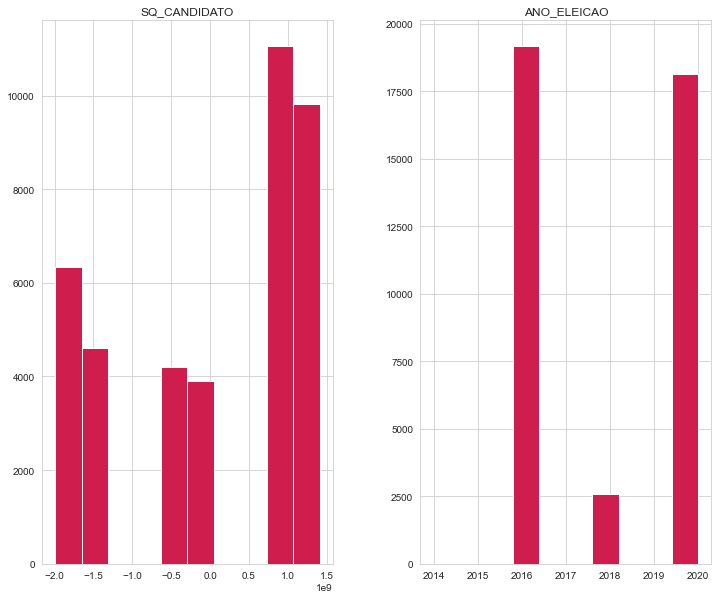

In [44]:
# Definindo as configurações do Gráfico
df_consulta_cassacao.hist(color="#cf1e4d", figsize=(12,10))
plt.show()

In [45]:
data_frame['SQ_CANDIDATO'].unique()
data_frame.dtypes

DT_GERACAO                      object
HH_GERACAO                      object
ANO_ELEICAO                      int32
CD_TIPO_ELEICAO                  int32
NM_TIPO_ELEICAO                 string
                                 ...  
CD_SITUACAO_CANDIDATO_PLEITO    string
DS_SITUACAO_CANDIDATO_PLEITO    string
CD_SITUACAO_CANDIDATO_URNA      string
DS_SITUACAO_CANDIDATO_URNA      string
ST_CANDIDATO_INSERIDO_URNA      string
Length: 63, dtype: object

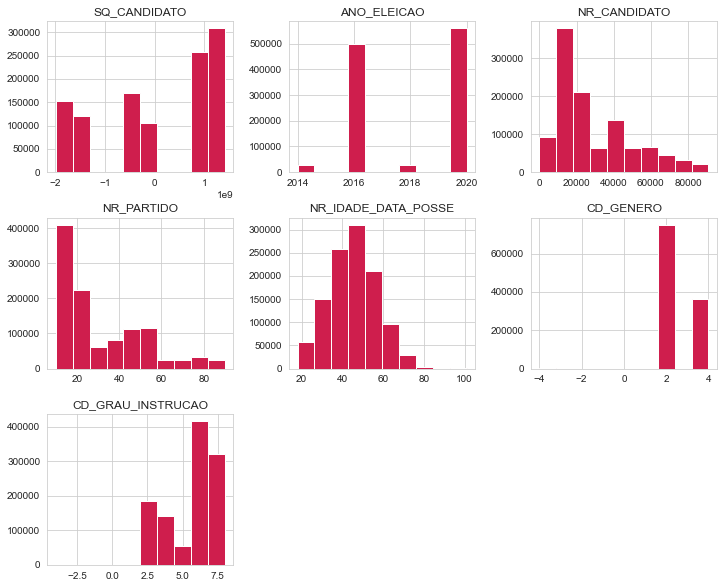

In [46]:
# Definindo as configurações do Gráfico
m_df_candidato_cassacao.hist(color="#cf1e4d", figsize=(12,10))
plt.show()

In [47]:
pd.isnull(m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'])

0          False
1          False
2          False
3          False
4          False
           ...  
1114719    False
1114720    False
1114721    False
1114722    False
1114723    False
Name: NR_IDADE_DATA_POSSE, Length: 1114724, dtype: bool

<b> Selecionando alguns dados para análise </b>

In [48]:
df_candidato_cassacao = m_df_candidato_cassacao[['SQ_CANDIDATO','ANO_ELEICAO','NR_CANDIDATO', 'NM_CANDIDATO', 'DS_CARGO','NR_PARTIDO','SG_PARTIDO' ,'SG_UF','SG_UE','DS_SIT_TOT_TURNO',
'NR_IDADE_DATA_POSSE','DS_GENERO', 'DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL','DS_COR_RACA','DS_SIT_TOT_TURNO',
'ST_REELEICAO', 'TP_ABRANGENCIA','DS_SIT_TOT_TURNO','ST_REELEICAO','ST_DECLARAR_BENS','CD_GENERO',
'CD_GRAU_INSTRUCAO', 'DS_MOTIVO_CASSACAO','DS_SITUACAO_CANDIDATURA']]

In [49]:
df_candidato_cassacao

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,DS_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_MOTIVO_CASSACAO,DS_SITUACAO_CANDIDATURA
0,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,S,2,7,NaN,APTO
1,1410065850,2014,40140,WILSON DE MELO LUNA,DEPUTADO ESTADUAL,40,PSB,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,S,2,4,NaN,APTO
2,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,S,2,2,NaN,APTO
3,1410065737,2014,43777,FRANCINEUDO SOUZA DA COSTA,DEPUTADO ESTADUAL,43,PV,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,S,2,8,NaN,APTO
4,1410065799,2014,43250,MICHELE SARAIVA SAMPAIO,DEPUTADO ESTADUAL,43,PV,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,N,4,8,NaN,APTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114719,-517292105,2020,11456,ALBERTINO VIEL,VEREADOR,11,PP,SC,83615,ELEITO POR QP,...,ELEITO POR QP,ELEITO POR QP,ELEITO POR QP,N,N,S,2,3,NaN,APTO
1114720,893008355,2020,51003,MARIA APARECIDA ALVES DOS SANTOS GARCIA,VEREADOR,51,PATRIOTA,SP,64157,NÃO ELEITO,...,NÃO ELEITO,NÃO ELEITO,NÃO ELEITO,N,N,S,4,8,NaN,APTO
1114721,892987285,2020,22333,CLENIL MENDES DOS SANTOS,VEREADOR,22,PL,SP,68950,ELEITO POR MÉDIA,...,ELEITO POR MÉDIA,ELEITO POR MÉDIA,ELEITO POR MÉDIA,S,S,S,2,8,NaN,APTO
1114722,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,ELEITO,ELEITO,ELEITO,N,N,S,2,8,NaN,APTO


In [50]:
m_df_candidato_bem_cassacao = pd.merge(df_candidato_cassacao, data_frame_Bem_candidato, on=['SQ_CANDIDATO','ANO_ELEICAO'], how="left")

In [51]:
m_df_candidato_bem_cassacao.isnull().sum()

SQ_CANDIDATO                     0
ANO_ELEICAO                      0
NR_CANDIDATO                     0
NM_CANDIDATO                     0
DS_CARGO                         0
NR_PARTIDO                       0
SG_PARTIDO                       0
SG_UF_x                          0
SG_UE_x                          0
DS_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
NR_IDADE_DATA_POSSE              0
DS_GENERO                        0
DS_GRAU_INSTRUCAO                0
DS_ESTADO_CIVIL                  0
DS_COR_RACA                      0
DS_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
ST_REELEICAO                     0
ST_REELEICAO                     0
TP_ABRANGENCIA                   0
DS_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
ST_REELEICAO                     0
ST_REELEICAO                     0
ST_DECLARAR_BENS    

In [52]:
#m_df_candidato_bem_cassacao.fillna(0, inplace = True)

In [53]:
m_df_candidato_bem_cassacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598601 entries, 0 to 2598600
Data columns (total 50 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   SQ_CANDIDATO             int32  
 1   ANO_ELEICAO              int32  
 2   NR_CANDIDATO             int32  
 3   NM_CANDIDATO             string 
 4   DS_CARGO                 string 
 5   NR_PARTIDO               int32  
 6   SG_PARTIDO               string 
 7   SG_UF_x                  string 
 8   SG_UE_x                  string 
 9   DS_SIT_TOT_TURNO         string 
 10  DS_SIT_TOT_TURNO         string 
 11  DS_SIT_TOT_TURNO         string 
 12  NR_IDADE_DATA_POSSE      float64
 13  DS_GENERO                string 
 14  DS_GRAU_INSTRUCAO        string 
 15  DS_ESTADO_CIVIL          string 
 16  DS_COR_RACA              object 
 17  DS_SIT_TOT_TURNO         string 
 18  DS_SIT_TOT_TURNO         string 
 19  DS_SIT_TOT_TURNO         string 
 20  ST_REELEICAO             string 
 21  ST_REELE

In [54]:
m_df_candidato_bem_cassacao.isnull().sum()

SQ_CANDIDATO                     0
ANO_ELEICAO                      0
NR_CANDIDATO                     0
NM_CANDIDATO                     0
DS_CARGO                         0
NR_PARTIDO                       0
SG_PARTIDO                       0
SG_UF_x                          0
SG_UE_x                          0
DS_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
NR_IDADE_DATA_POSSE              0
DS_GENERO                        0
DS_GRAU_INSTRUCAO                0
DS_ESTADO_CIVIL                  0
DS_COR_RACA                      0
DS_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
ST_REELEICAO                     0
ST_REELEICAO                     0
TP_ABRANGENCIA                   0
DS_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
ST_REELEICAO                     0
ST_REELEICAO                     0
ST_DECLARAR_BENS    

In [55]:
m_df_candidato_bem_cassacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598601 entries, 0 to 2598600
Data columns (total 50 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   SQ_CANDIDATO             int32  
 1   ANO_ELEICAO              int32  
 2   NR_CANDIDATO             int32  
 3   NM_CANDIDATO             string 
 4   DS_CARGO                 string 
 5   NR_PARTIDO               int32  
 6   SG_PARTIDO               string 
 7   SG_UF_x                  string 
 8   SG_UE_x                  string 
 9   DS_SIT_TOT_TURNO         string 
 10  DS_SIT_TOT_TURNO         string 
 11  DS_SIT_TOT_TURNO         string 
 12  NR_IDADE_DATA_POSSE      float64
 13  DS_GENERO                string 
 14  DS_GRAU_INSTRUCAO        string 
 15  DS_ESTADO_CIVIL          string 
 16  DS_COR_RACA              object 
 17  DS_SIT_TOT_TURNO         string 
 18  DS_SIT_TOT_TURNO         string 
 19  DS_SIT_TOT_TURNO         string 
 20  ST_REELEICAO             string 
 21  ST_REELE

In [56]:
m_df_candidato_bem_cassacao['DS_MOTIVO_CASSACAO'].unique()

array([nan, 'Ausência de requisito de registro ',
       'Ficha limpa (LC 64/90)', 'Conduta vedada (Lei 9.504/97).',
       'Indeferimento de partido ou coligação.',
       'Abuso de poder (LC 64/90)', 'Compra de voto (Lei 9.504/97).',
       'Impugnação', 'Gasto ilícito de recursos (Lei 9.504/97).',
       'Partido Invalidado'], dtype=object)

In [57]:
m_df_candidato_bem_cassacao['DS_CARGO'].unique()

<StringArray>
[ 'DEPUTADO ESTADUAL',   'DEPUTADO FEDERAL',        '2º SUPLENTE',
            'SENADOR',        '1º SUPLENTE',         'GOVERNADOR',
    'VICE-GOVERNADOR',         'PRESIDENTE',    'VICE-PRESIDENTE',
 'DEPUTADO DISTRITAL',           'VEREADOR',      'VICE-PREFEITO',
           'PREFEITO']
Length: 13, dtype: string

Text(-20.000000000000007, 0.5, 'características do núcleo da célula')

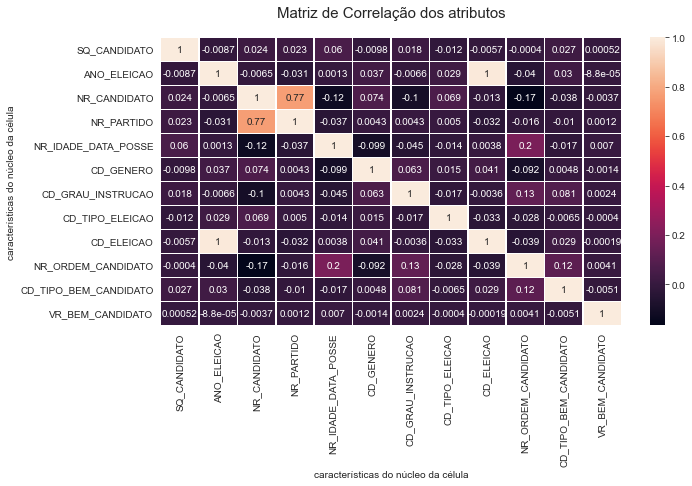

In [58]:
# Gráfico de Matriz de Correlação 
df_small = m_df_candidato_bem_cassacao.copy()
# O corr() método do Pandas DataFrame  é usado para calcular a matriz. 
# Por padrão, ele calcula o coeficiente de correlação de Pearson
correlation_mat = df_small.corr(method='pearson')
# Definindo as configurações do Gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])
# Usando o método heatmap para traçar a Matriz
# O parâmetro ' annot=True' exibe os valores do coeficiente de correlação em cada célula.
sns.heatmap(correlation_mat, annot = True, linewidth=0.5)
# Definindo titulo e labels do gráfico
eixo.set_title('Matriz de Correlação dos atributos', fontsize=15, pad=20)
eixo.set_xlabel ("características do núcleo da célula")
eixo.set_ylabel ("características do núcleo da célula")


In [59]:
correlation_mat = df_small.corr(method='pearson')
corr_pairs = correlation_mat.unstack()
corr_pairs

SQ_CANDIDATO      SQ_CANDIDATO             1.000000
                  ANO_ELEICAO             -0.008671
                  NR_CANDIDATO             0.024364
                  NR_PARTIDO               0.023106
                  NR_IDADE_DATA_POSSE      0.059694
                                             ...   
VR_BEM_CANDIDATO  CD_TIPO_ELEICAO         -0.000404
                  CD_ELEICAO              -0.000189
                  NR_ORDEM_CANDIDATO       0.004087
                  CD_TIPO_BEM_CANDIDATO   -0.005079
                  VR_BEM_CANDIDATO         1.000000
Length: 144, dtype: float64

In [60]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

NR_CANDIDATO           NR_ORDEM_CANDIDATO      -0.166557
NR_ORDEM_CANDIDATO     NR_CANDIDATO            -0.166557
NR_CANDIDATO           NR_IDADE_DATA_POSSE     -0.121694
NR_IDADE_DATA_POSSE    NR_CANDIDATO            -0.121694
NR_CANDIDATO           CD_GRAU_INSTRUCAO       -0.101474
                                                  ...   
NR_PARTIDO             NR_PARTIDO               1.000000
NR_CANDIDATO           NR_CANDIDATO             1.000000
ANO_ELEICAO            ANO_ELEICAO              1.000000
CD_TIPO_BEM_CANDIDATO  CD_TIPO_BEM_CANDIDATO    1.000000
VR_BEM_CANDIDATO       VR_BEM_CANDIDATO         1.000000
Length: 144, dtype: float64


In [61]:
negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

NR_CANDIDATO         NR_ORDEM_CANDIDATO    -0.166557
NR_ORDEM_CANDIDATO   NR_CANDIDATO          -0.166557
NR_CANDIDATO         NR_IDADE_DATA_POSSE   -0.121694
NR_IDADE_DATA_POSSE  NR_CANDIDATO          -0.121694
NR_CANDIDATO         CD_GRAU_INSTRUCAO     -0.101474
                                              ...   
NR_ORDEM_CANDIDATO   SQ_CANDIDATO          -0.000398
VR_BEM_CANDIDATO     CD_ELEICAO            -0.000189
CD_ELEICAO           VR_BEM_CANDIDATO      -0.000189
VR_BEM_CANDIDATO     ANO_ELEICAO           -0.000088
ANO_ELEICAO          VR_BEM_CANDIDATO      -0.000088
Length: 70, dtype: float64


In [62]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

NR_PARTIDO             NR_CANDIDATO             0.770953
NR_CANDIDATO           NR_PARTIDO               0.770953
CD_ELEICAO             ANO_ELEICAO              0.995205
ANO_ELEICAO            CD_ELEICAO               0.995205
SQ_CANDIDATO           SQ_CANDIDATO             1.000000
NR_ORDEM_CANDIDATO     NR_ORDEM_CANDIDATO       1.000000
CD_ELEICAO             CD_ELEICAO               1.000000
CD_TIPO_ELEICAO        CD_TIPO_ELEICAO          1.000000
CD_GRAU_INSTRUCAO      CD_GRAU_INSTRUCAO        1.000000
CD_GENERO              CD_GENERO                1.000000
NR_IDADE_DATA_POSSE    NR_IDADE_DATA_POSSE      1.000000
NR_PARTIDO             NR_PARTIDO               1.000000
NR_CANDIDATO           NR_CANDIDATO             1.000000
ANO_ELEICAO            ANO_ELEICAO              1.000000
CD_TIPO_BEM_CANDIDATO  CD_TIPO_BEM_CANDIDATO    1.000000
VR_BEM_CANDIDATO       VR_BEM_CANDIDATO         1.000000
dtype: float64


In [63]:
# Realizando a ordenação dos resultados
m_df_candidato_bem_cassacao.skew().sort_values(kind="quicksort")

CD_TIPO_ELEICAO          -16.067693
CD_GRAU_INSTRUCAO         -0.527145
SQ_CANDIDATO              -0.525881
ANO_ELEICAO               -0.111256
CD_ELEICAO                -0.001042
NR_IDADE_DATA_POSSE        0.080921
NR_CANDIDATO               0.981719
NR_PARTIDO                 1.070171
CD_GENERO                  1.248880
CD_TIPO_BEM_CANDIDATO      1.605296
NR_ORDEM_CANDIDATO         9.074207
VR_BEM_CANDIDATO         459.061242
dtype: float64

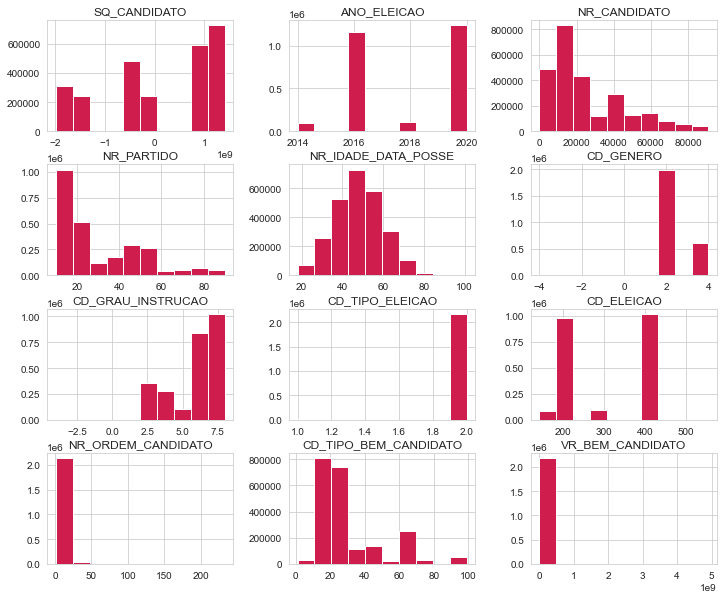

In [64]:
# Gráfico Histogramas 
df_small = m_df_candidato_bem_cassacao.copy()
# Definindo as configurações do Gráfico
df_small.hist(color="#cf1e4d", figsize=(12,10))
plt.show()

In [65]:
m_df_candidato_bem_cassacao

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF_x,SG_UE_x,DS_SIT_TOT_TURNO,...,SG_UF_y,SG_UE_y,NM_UE,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,AC,AC,ACRE,2.0,13.0,Terreno,"MED. 25X50, BR 364 - KM 04 - RAMAL DO HERCULAN...",50000.00,12/07/2018,16:36:00
1,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,AC,AC,ACRE,1.0,12.0,Casa,"EM ALVENARIA MED. 8X8, TERRENO 15X30",50000.00,12/07/2018,16:36:00
2,1410065850,2014,40140,WILSON DE MELO LUNA,DEPUTADO ESTADUAL,40,PSB,AC,AC,SUPLENTE,...,AC,AC,ACRE,1.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",MOTO HONDA CG TITAN 2005/2005 COR VERMELHA - P...,1500.00,12/07/2018,16:36:00
3,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,AC,AC,ACRE,4.0,21.0,"Veículo automotor terrestre: caminhão, automóv...","AUTOMÓVEL HILUX, PRETA, ANO 2013",120000.00,12/07/2018,16:36:00
4,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,AC,AC,ACRE,3.0,12.0,Casa,RESIDÊNCIA EM ALVENARIA EM FEIJÓ,100000.00,12/07/2018,16:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598596,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,SC,81515,IPUMIRIM,10.0,32.0,Quotas ou quinhões de capital,Quotas de Capital do banco Agencia Crediauc de...,4936.48,15/11/2020,22:03:16
2598597,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,SC,81515,IPUMIRIM,12.0,45.0,"Aplicação de renda fixa (CDB, RDB e outros)",BB renda fixa Banco do Brasil,1892.15,15/11/2020,22:03:16
2598598,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,SC,81515,IPUMIRIM,13.0,49.0,Outras aplicações e Investimentos,Ouro Cap mensal Banco do Brasil,1867.50,15/11/2020,22:03:16
2598599,893049816,2020,65171,ROMILDO SILVESTRE REZENDE DA SILVA,VEREADOR,65,PC do B,SP,68535,NÃO ELEITO,...,SP,68535,PERUÍBE,1.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",Kombi 1991,7000.00,16/09/2021,17:03:28


In [66]:
m_df_candidato_bem_cassacao['DS_MOTIVO_CASSACAO'].unique()

array([nan, 'Ausência de requisito de registro ',
       'Ficha limpa (LC 64/90)', 'Conduta vedada (Lei 9.504/97).',
       'Indeferimento de partido ou coligação.',
       'Abuso de poder (LC 64/90)', 'Compra de voto (Lei 9.504/97).',
       'Impugnação', 'Gasto ilícito de recursos (Lei 9.504/97).',
       'Partido Invalidado'], dtype=object)

In [67]:
m_df_candidato_bem_cassacao['DS_CARGO'].unique()

<StringArray>
[ 'DEPUTADO ESTADUAL',   'DEPUTADO FEDERAL',        '2º SUPLENTE',
            'SENADOR',        '1º SUPLENTE',         'GOVERNADOR',
    'VICE-GOVERNADOR',         'PRESIDENTE',    'VICE-PRESIDENTE',
 'DEPUTADO DISTRITAL',           'VEREADOR',      'VICE-PREFEITO',
           'PREFEITO']
Length: 13, dtype: string

In [68]:
cassados = m_df_candidato_bem_cassacao.loc[m_df_candidato_bem_cassacao['DS_MOTIVO_CASSACAO'].notnull()]

In [69]:
cassados['DS_CARGO'].unique()

<StringArray>
[        'GOVERNADOR',    'VICE-GOVERNADOR',           'VEREADOR',
           'PREFEITO',      'VICE-PREFEITO',  'DEPUTADO ESTADUAL',
   'DEPUTADO FEDERAL',            'SENADOR',        '1º SUPLENTE',
        '2º SUPLENTE',         'PRESIDENTE', 'DEPUTADO DISTRITAL']
Length: 12, dtype: string

In [70]:
cassados.loc[cassados['ANO_ELEICAO'] == 2016]

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF_x,SG_UE_x,DS_SIT_TOT_TURNO,...,SG_UF_y,SG_UE_y,NM_UE,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
95199,1410068527,2016,51111,LUCILENE VIANA MOREIRA,VEREADOR,51,PATRIOTA,AC,01473,#NULO#,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95320,1410068739,2016,65123,PRISCILA NOBREGA DUARTE,VEREADOR,65,PC do B,AC,01031,#NULO#,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95341,1410067223,2016,20333,GRACIELIA ASSIS DE AMORIM,VEREADOR,20,PSC,AC,01007,#NULO#,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95346,1410067486,2016,15777,ANTONIO CARLOS GOMES ARAUJO,VEREADOR,15,PMDB,AC,01139,NÃO ELEITO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95419,1410067020,2016,90007,MARIA DAS DORES NASCIMENTO JARUDE,VEREADOR,90,PROS,AC,01392,NÃO ELEITO,...,AC,1392,RIO BRANCO,3.0,11.0,Apartamento,APARTAMENTO,330000.0,12/07/2018,16:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255192,891918997,2016,20800,LUCIO CESAR PEREIRA FLORES,VEREADOR,20,PSC,SP,61204,NÃO ELEITO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255350,-1604373598,2016,43236,FERNANDO NOBRE GAROFOLO,VEREADOR,43,PV,ES,56120,#NULO#,...,ES,56120,MARATAÍZES,1.0,63.0,Dinheiro em espécie - moeda nacional,DINHEIRO EM ESPÉCIE ¿ MOEDA NACIONAL (REAL),17000.0,12/07/2018,16:35:39
1255377,891985759,2016,54008,MARCELO FERREIRA DE FARIA,VEREADOR,54,PPL,SP,63118,NÃO ELEITO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255383,1021466002,2016,36016,FERNANDO DO NASCIMENTO SOUZA,VEREADOR,36,PTC,RJ,58106,NÃO ELEITO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para iniciar a exploração dos dados será apresentado um sumário estatístico 
das variáveis com dados numéricos

In [71]:
data_frame_Bem_candidato.describe().round(2).astype(str)

,ANO_ELEICAO,CD_TIPO_ELEICAO,CD_ELEICAO,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
count,2168028.0,2168028.0,2168028.0,2168028.0,2168028.0,2168028.0,2168028.0
mean,2017.88,2.0,317.11,93588773.4,4.43,27.63,113846.1
std,2.07,0.06,104.8,1077080838.07,7.59,20.23,5899782.49
min,2014.0,1.0,143.0,-1993005055.0,1.0,1.0,-113.14
25%,2016.0,2.0,220.0,-517378277.25,1.0,13.0,7000.0
50%,2018.0,2.0,297.0,891903141.0,2.0,21.0,25000.0
75%,2020.0,2.0,426.0,1086242474.0,5.0,32.0,78201.63
max,2020.0,2.0,554.0,1411340335.0,233.0,99.0,4910551240.0


In [72]:
cassados[['SQ_CANDIDATO','ANO_ELEICAO','VR_BEM_CANDIDATO']]

,SQ_CANDIDATO,ANO_ELEICAO,VR_BEM_CANDIDATO
2948,1345306401,2014,307500.00
3857,1345306408,2014,550000.00
29886,-582929203,2014,200000.00
43154,-582929209,2014,1196709.62
43155,-582929209,2014,1099000.00
...,...,...,...
2597661,1022289797,2020,1700.08
2597662,1022289797,2020,678.65
2597710,892893849,2020,18000.00
2597856,-1603290802,2020,200000.00


<AxesSubplot:>

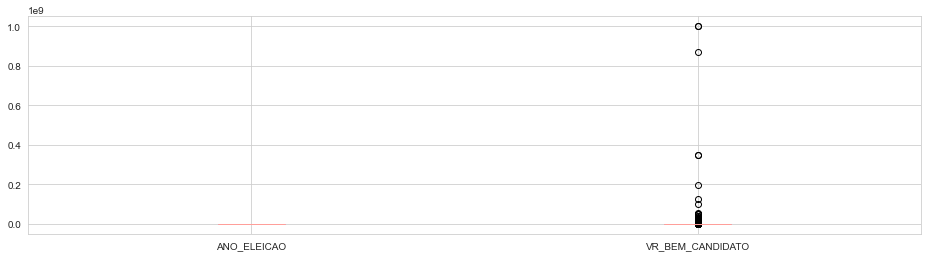

In [73]:
cassados[['ANO_ELEICAO','VR_BEM_CANDIDATO']].boxplot(figsize=(16,4))

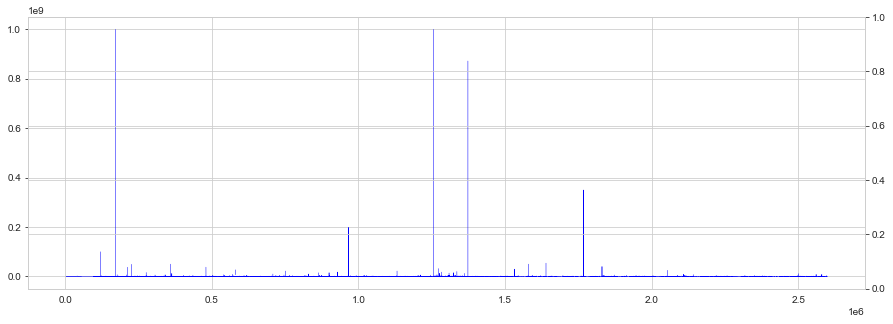

In [74]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1.plot(cassados[['ANO_ELEICAO','VR_BEM_CANDIDATO']], 'b', linewidth=0.5)

In [75]:
gk = cassados.groupby(['ANO_ELEICAO','DS_CARGO'])
gk.first()

SQ_CANDIDATO  NR_CANDIDATO  \
ANO_ELEICAO DS_CARGO                                         
2014        GOVERNADOR            1345306401            23   
            VICE-GOVERNADOR       1345306408            11   
2016        PREFEITO              1410066903            40   
            VEREADOR              1410068527         51111   
            VICE-PREFEITO        -1474205764            45   
2018        1º SUPLENTE          -1474217301           290   
            2º SUPLENTE          -1474217300           290   
            DEPUTADO DISTRITAL    1281139670         29029   
            DEPUTADO ESTADUAL     1410665626         17888   
            DEPUTADO FEDERAL      1410666256          1010   
            GOVERNADOR           -1474217304            29   
            PRESIDENTE             827751629            13   
            SENADOR              -1474217302           290   
            VICE-GOVERNADOR      -1474217303            29   
2020        PREFEITO              1411273580            77   
            VEREADOR              1411063766         50555   
            VICE-PREFEITO         1411131179            11   

                                                      NM_CANDIDATO  \
ANO_ELEICAO DS_CARGO                                                 
2014        GOVERNADOR                   LILIANE ARAUJO DE ALMEIDA   
            VICE-GOVERNADOR              ABDALA HABIB FRAXE JUNIOR   
2016        PREFEITO                    JOÃO EDVALDO TELES DE LIMA   
            VEREADOR                        LUCILENE VIANA MOREIRA   
            VICE-PREFEITO             PERISVALDO BERNARDO DA SILVA   
2018        1º SUPLENTE               KÁTIA LIA CAVALCANTE VASSALO   
            2º SUPLENTE                     JOSENEY ANDRADE TORRES   
            DEPUTADO DISTRITAL       EXPEDITO CARNEIRO DE MENDONÇA   
            DEPUTADO ESTADUAL           GILBERTO GIL GOUVEIA DINIZ   
            DEPUTADO FEDERAL    MANUEL MARCOS CARVALHO DE MESQUITA   
            GOVERNADOR                   MELQUEZEDEQUE FARIAS ROSA   
            PRESIDENTE                   LUIZ INÁCIO LULA DA SILVA   
            SENADOR                           FLÁVIA PIRES DE MELO   
            VICE-GOVERNADOR                 ÉLCIO LINS DE OLIVEIRA   
2020        PREFEITO                        RIVELINO DA SILVA MOTA   
            VEREADOR                            SEBASTIÃO DA SILVA   
            VICE-PREFEITO                    ROGÉRIO CORREA MORAIS   

                                NR_PARTIDO     SG_PARTIDO SG_UF_x SG_UE_x  \
ANO_ELEICAO DS_CARGO                                                        
2014        GOVERNADOR                  23            PPS      AM      AM   
            VICE-GOVERNADOR             19           PODE      AM      AM   
2016        PREFEITO                    40            PSB      AC   01007   
            VEREADOR                    51       PATRIOTA      AC   01473   
            VICE-PREFEITO               45           PSDB      AL   28576   
2018        1º SUPLENTE                 29            PCO      AL      AL   
            2º SUPLENTE                 29            PCO      AL      AL   
            DEPUTADO DISTRITAL          29            PCO      DF      DF   
            DEPUTADO ESTADUAL           17            PSL      AC      AC   
            DEPUTADO FEDERAL            10            PRB      AC      AC   
            GOVERNADOR                  29            PCO      AL      AL   
            PRESIDENTE                  13             PT      BR      BR   
            SENADOR                     29            PCO      AL      AL   
            VICE-GOVERNADOR             29            PCO      AL      AL   
2020        PREFEITO                    77  SOLIDARIEDADE      AC   01031   
            VEREADOR                    50           PSOL      AC   01490   
            VICE-PREFEITO               90           PROS      AC   01090   

                               DS_SIT_TOT_TURNO DS_SIT_TOT

In [76]:
gk = cassados.groupby('ANO_ELEICAO')['VR_BEM_CANDIDATO'].sum()
gk

ANO_ELEICAO
2014    6.163043e+06
2016    4.106052e+09
2018    1.987388e+09
2020    3.919684e+09
Name: VR_BEM_CANDIDATO, dtype: float64

In [77]:
gk = cassados.groupby('ANO_ELEICAO')['VR_BEM_CANDIDATO'].mean()
gk

ANO_ELEICAO
2014    324370.665789
2016    164987.815258
2018    429056.215797
2020    189484.890565
Name: VR_BEM_CANDIDATO, dtype: float64

In [78]:
gk = cassados.groupby('ANO_ELEICAO')['VR_BEM_CANDIDATO'].min()
gk

ANO_ELEICAO
2014    1197.40
2016       0.00
2018       0.01
2020       0.00
Name: VR_BEM_CANDIDATO, dtype: float64

In [79]:
gk = cassados.groupby('ANO_ELEICAO')['VR_BEM_CANDIDATO'].max()
gk

ANO_ELEICAO
2014    1.196710e+06
2016    1.000000e+09
2018    1.000000e+09
2020    8.720000e+08
Name: VR_BEM_CANDIDATO, dtype: float64

In [80]:
gk = cassados.groupby('SG_PARTIDO')['SG_PARTIDO'].count()
gk

SG_PARTIDO
AVANTE           1160
CIDADANIA         824
DC                686
DEM              3053
MDB              2769
NOVO                4
PATRIOTA         1912
PC do B          1491
PCB                40
PCO               399
PDT              3735
PHS               944
PL               1284
PMB              1030
PMDB             2891
PMN              1261
PODE             1336
PP               3663
PPL               561
PPS              1332
PR               1663
PRB              1194
PROS             1636
PRP               793
PRTB             1649
PSB              3586
PSC              2098
PSD              3756
PSDB             4713
PSDC              567
PSL              2457
PSOL             1160
PSTU               48
PT               4024
PT do B           561
PTB              3191
PTC              1571
PTN               673
PV               1732
REDE              865
REPUBLICANOS     1527
SD                927
SOLIDARIEDADE    1015
UP                  2
Name: SG_PARTIDO, dty

In [81]:
gk = cassados.groupby(['ANO_ELEICAO','DS_CARGO'])['DS_CARGO'].count()
gk

ANO_ELEICAO  DS_CARGO          
2014         GOVERNADOR               15
             VICE-GOVERNADOR           4
2016         PREFEITO               4201
             VEREADOR              28461
             VICE-PREFEITO          2111
2018         1º SUPLENTE             130
             2º SUPLENTE             103
             DEPUTADO DISTRITAL      156
             DEPUTADO ESTADUAL      3241
             DEPUTADO FEDERAL       2055
             GOVERNADOR              200
             PRESIDENTE               38
             SENADOR                 165
             VICE-GOVERNADOR          50
2020         PREFEITO               3449
             VEREADOR              25666
             VICE-PREFEITO          1738
Name: DS_CARGO, dtype: int64

In [82]:
gk = cassados.groupby(['ANO_ELEICAO','DS_CARGO','SG_PARTIDO'])['SG_PARTIDO'].count()
gk

ANO_ELEICAO  DS_CARGO         SG_PARTIDO   
2014         GOVERNADOR       PPS               1
                              PSOL             14
             VICE-GOVERNADOR  PODE              1
                              PSOL              3
2016         PREFEITO         AVANTE            1
                                               ..
2020         VICE-PREFEITO    PV               16
                              REDE             24
                              REPUBLICANOS     31
                              SOLIDARIEDADE    52
                              UP                1
Name: SG_PARTIDO, Length: 364, dtype: int64

In [83]:
gk = cassados.groupby(['ANO_ELEICAO','SG_PARTIDO','DS_CARGO'])['SG_PARTIDO'].count()
gk.head()

ANO_ELEICAO  SG_PARTIDO  DS_CARGO       
2014         PODE        VICE-GOVERNADOR     1
             PPS         GOVERNADOR          1
             PSOL        GOVERNADOR         14
                         VICE-GOVERNADOR     3
2016         AVANTE      PREFEITO            1
Name: SG_PARTIDO, dtype: int64

In [84]:
gk = cassados.groupby(['ANO_ELEICAO','SG_PARTIDO','DS_CARGO'])['SG_PARTIDO'].count()
gk

ANO_ELEICAO  SG_PARTIDO     DS_CARGO       
2014         PODE           VICE-GOVERNADOR      1
             PPS            GOVERNADOR           1
             PSOL           GOVERNADOR          14
                            VICE-GOVERNADOR      3
2016         AVANTE         PREFEITO             1
                                              ... 
2020         SOLIDARIEDADE  PREFEITO            96
                            VEREADOR           703
                            VICE-PREFEITO       52
             UP             VEREADOR             1
                            VICE-PREFEITO        1
Name: SG_PARTIDO, Length: 364, dtype: int64

In [85]:
cassados['VR_BEM_CANDIDATO'].describe().astype('int')

count         50224
mean         199492
std         7861641
min               0
25%            8000
50%           28000
75%           90000
max      1000000000
Name: VR_BEM_CANDIDATO, dtype: int32

In [86]:
#Agrupamento dos bens por candidato
df_bem = cassados.groupby(['SQ_CANDIDATO']).sum()

In [87]:
df_bem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36993 entries, -1993004580 to 1411338776
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ANO_ELEICAO            36993 non-null  int32  
 1   NR_CANDIDATO           36993 non-null  int32  
 2   NR_PARTIDO             36993 non-null  int32  
 3   NR_IDADE_DATA_POSSE    36993 non-null  float64
 4   CD_GENERO              36993 non-null  int32  
 5   CD_GRAU_INSTRUCAO      36993 non-null  int32  
 6   CD_TIPO_ELEICAO        36993 non-null  float64
 7   CD_ELEICAO             36993 non-null  float64
 8   NR_ORDEM_CANDIDATO     36993 non-null  float64
 9   CD_TIPO_BEM_CANDIDATO  36993 non-null  float64
 10  VR_BEM_CANDIDATO       36993 non-null  float64
dtypes: float64(6), int32(5)
memory usage: 2.7 MB


In [88]:
#Descrição estatística do dataframe df_bem após agrupamento
cassados['VR_BEM_CANDIDATO'].describe().astype('int')

count         50224
mean         199492
std         7861641
min               0
25%            8000
50%           28000
75%           90000
max      1000000000
Name: VR_BEM_CANDIDATO, dtype: int32

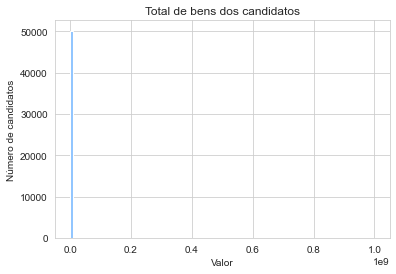

In [89]:
#Plotagem do histograma dos valores dos bens dos candidatos - corrigido
cassados.VR_BEM_CANDIDATO.hist(bins=100)
plt.style.use('seaborn-pastel')
plt.xlabel("Valor")
plt.ylabel("Número de candidatos")
plt.title("Total de bens dos candidatos")
plt.show()

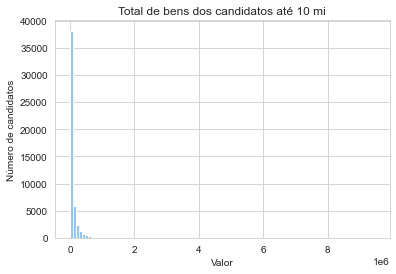

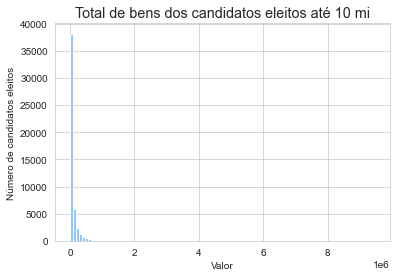

In [90]:
#Criação de um dataframe com bens dos candidatos até R$ 10.000.000,00
df_consolidado_10mi = cassados.loc[(cassados['VR_BEM_CANDIDATO'] < 10000000)]
#Criação de um dataframe com bens dos candidatos eleitos até R$ 10.000.000,00
df_consolidado_eleitos_10mi = cassados.loc[(cassados['VR_BEM_CANDIDATO'] < 10000000)]
#Plotagem dos bens de candidatos até R$ 10.000.000,00
df_consolidado_10mi.VR_BEM_CANDIDATO.hist(bins=100)
plt.style.use('seaborn-pastel')
plt.xlabel("Valor")
plt.ylabel("Número de candidatos")
plt.title("Total de bens dos candidatos até 10 mi")
plt.show()
#Plotagem dos bens de candidatos eleitos até R$ 10.000.000,00
df_consolidado_eleitos_10mi.VR_BEM_CANDIDATO.hist(bins=100)
plt.style.use('ggplot')
plt.xlabel("Valor")
plt.ylabel("Número de candidatos eleitos")
plt.title("Total de bens dos candidatos eleitos até 10 mi")
plt.show()



In [91]:
#Criação de um dataframe final com candidatos eleitos
df_eleitos = data_frame[data_frame.DS_SIT_TOT_TURNO.isin(['ELEITO POR MÉDIA', 'ELEITO POR QP'])]

In [92]:
#Transformação de valores categóricos em valores inteiros
dadosCategoricos = pd.get_dummies(data_frame[['NR_IDADE_DATA_POSSE','DS_GENERO', 'DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_SIT_TOT_TURNO' ]])

In [93]:
lula = cassados.loc[cassados['DS_CARGO'] == 'PRESIDENTE']


In [94]:
data_frame

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,54232014,3506420146010000,2,DEFERIDO,2,DEFERIDO,SIM
1,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,56222014,5212120146010000,2,DEFERIDO,2,DEFERIDO,SIM
2,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,54682014,3757720146010000,2,DEFERIDO,2,DEFERIDO,SIM
3,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,55432014,4501920146010000,2,DEFERIDO,2,DEFERIDO,SIM
4,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,N,55672014,4744720146010000,2,DEFERIDO,2,DEFERIDO,SIM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558003,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO POR QP,N,S,-1,06003782920206240033,2,DEFERIDO,2,DEFERIDO,SIM
558004,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,06001765820206260401,2,DEFERIDO,2,DEFERIDO,SIM
558005,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO POR MÉDIA,S,S,-1,06003452920206260083,2,DEFERIDO,2,DEFERIDO,SIM
558006,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO,N,S,-1,06001334120206240090,2,DEFERIDO,2,DEFERIDO,SIM


In [95]:
for index, row in data_frame_bem_maior_10_mil.iterrows():
    print(index)
    print('Candidato: ' + str(row['SQ_CANDIDATO']))
    print('Ano: ' + str(row['ANO_ELEICAO']))
    print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))
    print('Valor ' + str(row['VR_BEM_CANDIDATO']) + '\n')
    

345
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: LAGINHA AGRO INDUSTRIAL S/A
Valor 196031864.0

368
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: LUG TAXI AEREO LTDA
Valor 14987952.0

755
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: INCORPORAÇÃO AO CAPITAL DE LAGINHA AGRO INDUSTRIAL S/A DE 6.999.888 AÇÕES ON
Valor 16299739.0

1163
Candidato: -1539606910
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DA EMPRESA TOTAL PARTICIPAÇÕES LTDA
Valor 39375000.0

56
Candidato: -194312208
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE 74,872% DO VALOR TOTAL DA EMPRESA PRIORE EMPREENDIMENTOS E PARTICIPAÇOES
Valor 17434902.0

880
Candidato: 956668094
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE CAPITALNA FIRMA EUCATUR-EMP. UNIÃO CASCAVEL T.T LTDA. CGC

Descrição: UMA CASA SOBRE POSTA ALTA ADQUQIRIDO NA CONDIÇOES DE FINANCIAMENTO NO BANCO INTERMEDIUM
Valor 27000000.0

648060
Candidato: 1151050391
Ano: 2016
Tipo de Bem: Direito de autor, de inventor e patente
Descrição: BENS E OU DIREITOS, APORTADOS EM PATRIMÔNIOS INTANGÍVEL COMO REGISTRO DE MARCAS E PATENTES, REGISTROS INPI 909676534, 909677166, 909677530, 909678448, 910629757, 910737096
Valor 21155613.0

651617
Candidato: 1086238066
Ano: 2016
Tipo de Bem: Terreno
Descrição: UMA AREA DE TERRAS URBANAS
Valor 16199530.0

652226
Candidato: -1733912764
Ano: 2016
Tipo de Bem: Casa
Descrição: UMA CASA NA RUA BRASIL S/N. BAIRRO LARANJEIRA
Valor 150000000.0

653195
Candidato: 891910520
Ano: 2016
Tipo de Bem: Crédito decorrente de alienação
Descrição: VALOR A RECEBER DE TAVARES DE ALMEIA PARTICIPAÇÕES S/A REFERENTE ALIENAÇÃO DE AÇÕES EM 01.10.2015
Valor 19000000.0

660377
Candidato: -1669145655
Ano: 2016
Tipo de Bem: Benfeitorias
Descrição: 25% DAS BENFEITORIAS SOBRE AREA DE TERRA COM 823,9 HA

Tipo de Bem: Quotas ou quinhões de capital
Descrição: #NULO#
Valor 55047748.0

78635
Candidato: -1668536980
Ano: 2018
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE CAPITAL (95,0%) DA EMPRESA RAF CONSTRUCOES E PARTICIPACOES LTDA - CNPJ: 32.932.253/0001-90 - CONSTITUIDA EM 02/03/1989.
Valor 44347900.0

79269
Candidato: 1086819275
Ano: 2018
Tipo de Bem: Outras aplicações e Investimentos
Descrição: DEBENTURES- OS SECURITIZADORA ¿ ADQUIRIDO EM 2011 R$ 9.600.000,00 AQUISIÇÃO EM 2012 APLICADO 1.700.000,00 E RESGATADO EM 2012 1.300.000,00 APLICAÇÃO EM 2013 R$ 1.600,000,00 EM 2014 AQUISIÇÃO DEBENTURE
Valor 20100000.0

79508
Candidato: -1668526331
Ano: 2018
Tipo de Bem: Terra nua
Descrição: UMA AREA DE TERRA DENOMINADA FAZENDA SAO MATEUS, C/ AREA DE MUN. DE GENERAL CARNEIRO/MT, ADQ. EM 06/04/2004 DE CLEITON EUSTAQUIO ROCHA - MATRICULA 34.724
Valor 11000000.0

80629
Candidato: 1022041227
Ano: 2018
Tipo de Bem: Casa
Descrição: Rio de Janeiro - RJ, Matrícula 024 do 2. Ofício do RG

Candidato: 1151983400
Ano: 2020
Tipo de Bem: Casa
Descrição: uma casa residencial localizada na Rua dos Andradas, n. 336, centro São Lourenço 
Valor 28237000.0

816411
Candidato: 1216470426
Ano: 2020
Tipo de Bem: Terreno
Descrição: TERRENO NA PONTA DO FAROL - SÃO LU´ÍS
Valor 20000000.0

816792
Candidato: 1022384529
Ano: 2020
Tipo de Bem: Casa
Descrição: UMA CASA SITUADA NA RUA ELIS REGINA N°91, CASA 01, JARDIM CAMPOMAR, RIO DAS OSTRAS/RJ
Valor 54870000.0

825367
Candidato: 1087008510
Ano: 2020
Tipo de Bem: Quotas ou quinhões de capital
Descrição: FERTIMOURAO AGRICOLA LTDA
Valor 20000000.0

835528
Candidato: 892569091
Ano: 2020
Tipo de Bem: Apartamento
Descrição: apartamento
Valor 1100000000.0

842069
Candidato: -581892380
Ano: 2020
Tipo de Bem: Outros bens imóveis
Descrição: FAZENDA CHAPADINHA, 800 ALQUEIRES, ZONA RURAL DE DIANÓPOLIS/TO
Valor 12000000.0

851617
Candidato: 1152113529
Ano: 2020
Tipo de Bem: Prédio residencial
Descrição: Um imovél com 2 pavimentos - situado na rua dalia, 

In [96]:
data_frame_Bem_candidato['VR_BEM_CANDIDATO'].max()

4910551240.0

In [97]:
data_frame_bem_maior_10_mil['VR_BEM_CANDIDATO']

345        1.960319e+08
368        1.498795e+07
755        1.629974e+07
1163       3.937500e+07
56         1.743490e+07
               ...     
998201     1.140000e+07
1000286    1.400000e+07
1002579    2.976333e+07
1008246    1.800000e+08
1008440    3.027153e+07
Name: VR_BEM_CANDIDATO, Length: 755, dtype: float64

In [98]:
data_frame_bem_maior_10_mil.loc[(data_frame_bem_maior_10_mil['VR_BEM_CANDIDATO'] == data_frame_Bem_candidato['VR_BEM_CANDIDATO'].max())]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
471375,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RJ,58017,ANGRA DOS REIS,1022458107,13,2,Prédio comercial,PREDIO NA PRAIA DE BOTAFOGO - RIO DE JANEIRO - RJ,4.910551e+09,15/11/2020,22:57:54


In [99]:
data_frame['DS_SITUACAO_CANDIDATURA'].unique()

<StringArray>
['APTO', 'INAPTO', 'CADASTRADO']
Length: 3, dtype: string

In [100]:
m_df_candidato_bem_cassacao['DS_SITUACAO_CANDIDATURA'].unique()

<StringArray>
['APTO', 'INAPTO', 'CADASTRADO']
Length: 3, dtype: string

In [101]:
# Plotação de um gráfico para mostrar a dispersão dos dados. O % e inline significa que o gráfico será mostrado aqui no notebook, e não em um arquivo
%matplotlib inline

In [102]:
m_df_candidato_bem_cassacao

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF_x,SG_UE_x,DS_SIT_TOT_TURNO,...,SG_UF_y,SG_UE_y,NM_UE,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,AC,AC,ACRE,2.0,13.0,Terreno,"MED. 25X50, BR 364 - KM 04 - RAMAL DO HERCULAN...",50000.00,12/07/2018,16:36:00
1,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,AC,AC,ACRE,1.0,12.0,Casa,"EM ALVENARIA MED. 8X8, TERRENO 15X30",50000.00,12/07/2018,16:36:00
2,1410065850,2014,40140,WILSON DE MELO LUNA,DEPUTADO ESTADUAL,40,PSB,AC,AC,SUPLENTE,...,AC,AC,ACRE,1.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",MOTO HONDA CG TITAN 2005/2005 COR VERMELHA - P...,1500.00,12/07/2018,16:36:00
3,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,AC,AC,ACRE,4.0,21.0,"Veículo automotor terrestre: caminhão, automóv...","AUTOMÓVEL HILUX, PRETA, ANO 2013",120000.00,12/07/2018,16:36:00
4,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,AC,AC,ACRE,3.0,12.0,Casa,RESIDÊNCIA EM ALVENARIA EM FEIJÓ,100000.00,12/07/2018,16:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598596,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,SC,81515,IPUMIRIM,10.0,32.0,Quotas ou quinhões de capital,Quotas de Capital do banco Agencia Crediauc de...,4936.48,15/11/2020,22:03:16
2598597,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,SC,81515,IPUMIRIM,12.0,45.0,"Aplicação de renda fixa (CDB, RDB e outros)",BB renda fixa Banco do Brasil,1892.15,15/11/2020,22:03:16
2598598,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,SC,81515,IPUMIRIM,13.0,49.0,Outras aplicações e Investimentos,Ouro Cap mensal Banco do Brasil,1867.50,15/11/2020,22:03:16
2598599,893049816,2020,65171,ROMILDO SILVESTRE REZENDE DA SILVA,VEREADOR,65,PC do B,SP,68535,NÃO ELEITO,...,SP,68535,PERUÍBE,1.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",Kombi 1991,7000.00,16/09/2021,17:03:28


<b>Regressão Linear</b> 
De acordo com o google: "A regressão linear quantifica a relação entre uma ou mais variáveis ​​preditoras e uma variável de resultado. Por exemplo, a regressão linear pode ser usada para quantificar os impactos relativos de idade, sexo e dieta (as variáveis ​​preditoras) na altura (a variável de desfecho)."

O modelo de regressão linear é baseado em uma equação de primeiro grau, com a fórmula sendo: y = ax + b. O "x" é o coeficiente angular e o "b" é o coeficiente linear.

Coeficiente angular: indica a inclinação da reta Coeficiente linear: realiza a intersecção com o eixo x

A fórmula da regressão linear busca, justamente, encontrar o valor de a e de b. Neste caso, utilizaremos esse modelo para estimar um novo valor baseado nos atributos de entrada.

Ajustaremos uma equação linear entre os dados observados, ou seja, encontraremo uma reta que melhor explica a relação entre os dados.

Para saber mais sobre a regressão linear visite: https://oestatistico.com.br/regressao-linear-simples/

In [103]:
#Contagem das opções da coluna DS_GENERO
genero_candidatos = Counter(m_df_candidato_bem_cassacao['DS_GENERO'])
genero_candidatos

Counter({'MASCULINO': 1993340, 'FEMININO': 605188, 'NÃO DIVULGÁVEL': 73})

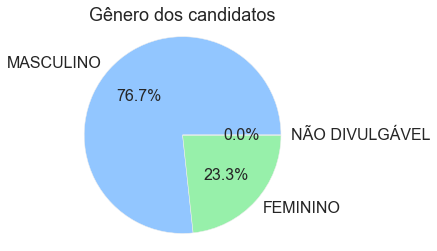

In [104]:
#Plotagem das informações de gênero dos candidatos
plt.style.use('seaborn-pastel')
plt.pie(genero_candidatos.values(), labels = genero_candidatos.keys(), 
        autopct = '%1.1f%%', textprops={'fontsize': 16})
plt.axis("image")
plt.title("Gênero dos candidatos", fontsize=18)
plt.show()

In [105]:
#Contagem das opções da coluna DS_GENERO
genero_candidatos_cassados = Counter(cassados['DS_GENERO'])
genero_candidatos_cassados

Counter({'FEMININO': 18905, 'MASCULINO': 52878})

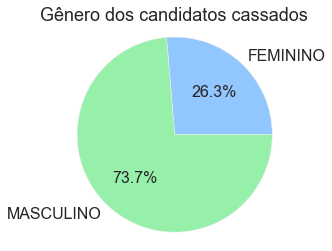

In [106]:
#Plotagem das informações de gênero dos candidatos
plt.style.use('seaborn-pastel')
plt.pie(genero_candidatos_cassados.values(), labels = genero_candidatos_cassados.keys(), 
        autopct = '%1.1f%%', textprops={'fontsize': 16})
plt.axis("image")
plt.title("Gênero dos candidatos cassados", fontsize=18)
plt.show()

In [107]:
idade_cassados = Counter(cassados['NR_IDADE_DATA_POSSE'])
idade_cassados

Counter({35.0: 1307,
         48.0: 2054,
         51.0: 2381,
         49.0: 2191,
         47.0: 1860,
         24.0: 351,
         27.0: 483,
         59.0: 1715,
         55.0: 1949,
         34.0: 1216,
         44.0: 1911,
         50.0: 2255,
         52.0: 2094,
         32.0: 1018,
         43.0: 1754,
         37.0: 1459,
         72.0: 401,
         45.0: 2070,
         54.0: 2192,
         42.0: 1845,
         30.0: 741,
         38.0: 1656,
         40.0: 1815,
         23.0: 341,
         60.0: 1640,
         25.0: 405,
         22.0: 279,
         33.0: 1060,
         28.0: 554,
         66.0: 1037,
         53.0: 2231,
         39.0: 1655,
         36.0: 1356,
         41.0: 1940,
         70.0: 599,
         29.0: 708,
         56.0: 1967,
         46.0: 2071,
         31.0: 854,
         74.0: 284,
         58.0: 2028,
         18.0: 144,
         21.0: 226,
         26.0: 435,
         61.0: 1399,
         76.0: 226,
         19.0: 182,
         69.0: 516,
         2

In [113]:
idade_publico = Counter(m_df_candidato_bem_cassacao['NR_IDADE_DATA_POSSE'])
idade_publico

Counter({42.0: 76064,
         43.0: 76186,
         46.0: 81813,
         29.0: 24576,
         37.0: 61988,
         50.0: 83382,
         40.0: 70559,
         51.0: 83517,
         52.0: 84049,
         24.0: 11209,
         30.0: 28157,
         39.0: 69385,
         34.0: 48504,
         49.0: 82089,
         60.0: 54703,
         54.0: 78409,
         63.0: 40034,
         41.0: 72620,
         61.0: 47773,
         27.0: 18323,
         33.0: 43234,
         62.0: 45254,
         53.0: 81037,
         38.0: 66832,
         35.0: 53257,
         47.0: 81616,
         28.0: 21699,
         45.0: 78407,
         32.0: 37216,
         59.0: 57858,
         48.0: 83589,
         36.0: 55321,
         31.0: 32964,
         68.0: 22187,
         58.0: 63664,
         57.0: 67469,
         25.0: 13330,
         55.0: 75291,
         44.0: 78838,
         71.0: 12828,
         21.0: 6378,
         66.0: 29328,
         22.0: 7923,
         65.0: 31949,
         64.0: 35851,
         26.

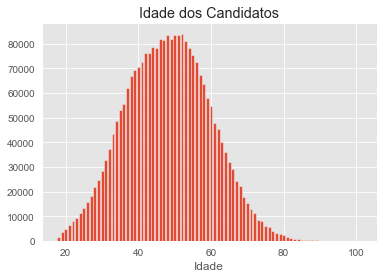

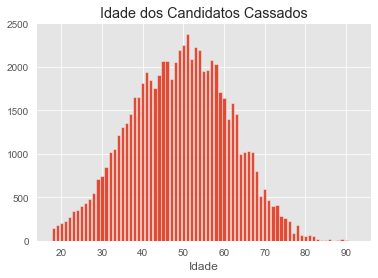

In [117]:
#Plotagem da idade dos candidatos
plt.style.use('ggplot')
plt.bar(idade_publico.keys(), idade_publico.values())
plt.xlabel('Idade')
plt.title('Idade dos Candidatos')
plt.show()
##
#Plotagem da idade dos candidatos
plt.style.use('ggplot')
plt.bar(idade_cassados.keys(), idade_cassados.values())
plt.xlabel('Idade')
plt.title('Idade dos Candidatos Cassados')
plt.show()